## Lecture 4 Coding Exercise: Multivariate Time Series Analysis

### Objectives:

- Understand relationships and dependencies in multivariate time series data
- Apply Granger causality, Vector Autoregression (VAR), and Vector Error Correction Model (VECM)
- Fit ARIMAX models with exogenous variables
- Compare and evaluate the performance of different models


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import datasets
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### 1. Load and Explore the Dataset
 Load the dataset and visualize key variables to understand their trends over time

#### **Load and prepare the time series dataset**.

   - Load a real-life multivariate time series dataset, the variables should have a trend and an expected relationships between them 
   - Handle any missing values and set the appropriate frequency for the dataset
   - The **"Global Economic Data"** dataset is provided as an example solution - The target variable is **'GDP'** (Gross Domestic Product) to understand how different components of the economy contribute to overall growth

In [ ]:
# Load the dataset
df = datasets.macrodata.load_pandas().data

# Convert year and quarter to integers
df['year'] = df['year'].astype(int)
df['quarter'] = df['quarter'].astype(int)

# Use the year and quarter columns to create a new index with specified frequency
df.index = pd.PeriodIndex(year=df['year'], quarter=df['quarter'], freq='Q')

# Display the dataframe
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### Orgenize column & Handle missing data

In [ ]:
# Remove the year and quarter columns
df.drop(columns=['year', 'quarter'], inplace=True)

# Rename columns to easy-to-understand names
df.rename(columns={
    'realgdp': 'GDP',
    'realcons': 'Consumption',
    'realinv': 'Investment',
    'realgovt': 'Government_Spending',
    'realdpi': 'Disposable_Income',
    'cpi': 'CPI',
    'm1': 'Money_Supply',
    'tbilrate': 'T_Bill_Rate',
    'unemp': 'Unemployment_Rate',
    'pop': 'Population',
    'infl': 'Inflation',
    'realint': 'Interest_Rate'
}, inplace=True)

# Count missing values
print('number of missing values', df.isnull().sum(), '\n\n')

df.info()

number of missing values GDP                    0
Consumption            0
Investment             0
Government_Spending    0
Disposable_Income      0
CPI                    0
Money_Supply           0
T_Bill_Rate            0
Unemployment_Rate      0
Population             0
Inflation              0
Interest_Rate          0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 203 entries, 1959Q1 to 2009Q3
Freq: Q-DEC
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GDP                  203 non-null    float64
 1   Consumption          203 non-null    float64
 2   Investment           203 non-null    float64
 3   Government_Spending  203 non-null    float64
 4   Disposable_Income    203 non-null    float64
 5   CPI                  203 non-null    float64
 6   Money_Supply         203 non-null    float64
 7   T_Bill_Rate          203 non-null    float64
 8   Unemployment_Rate    203 non

#### plot the data and inspect patterns visually

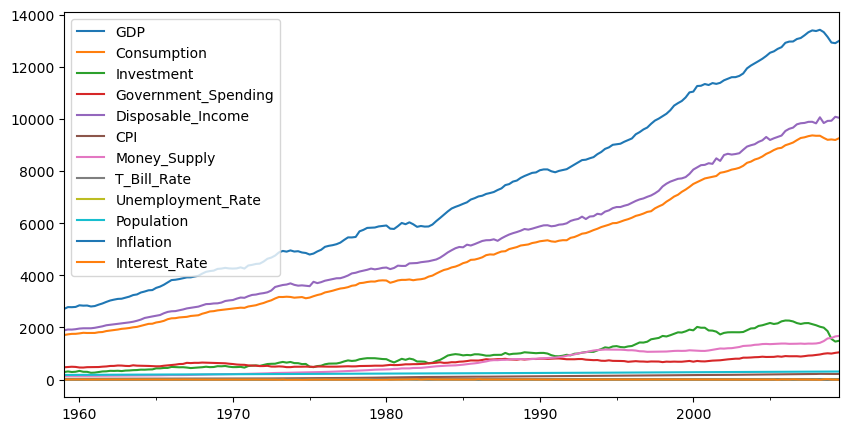

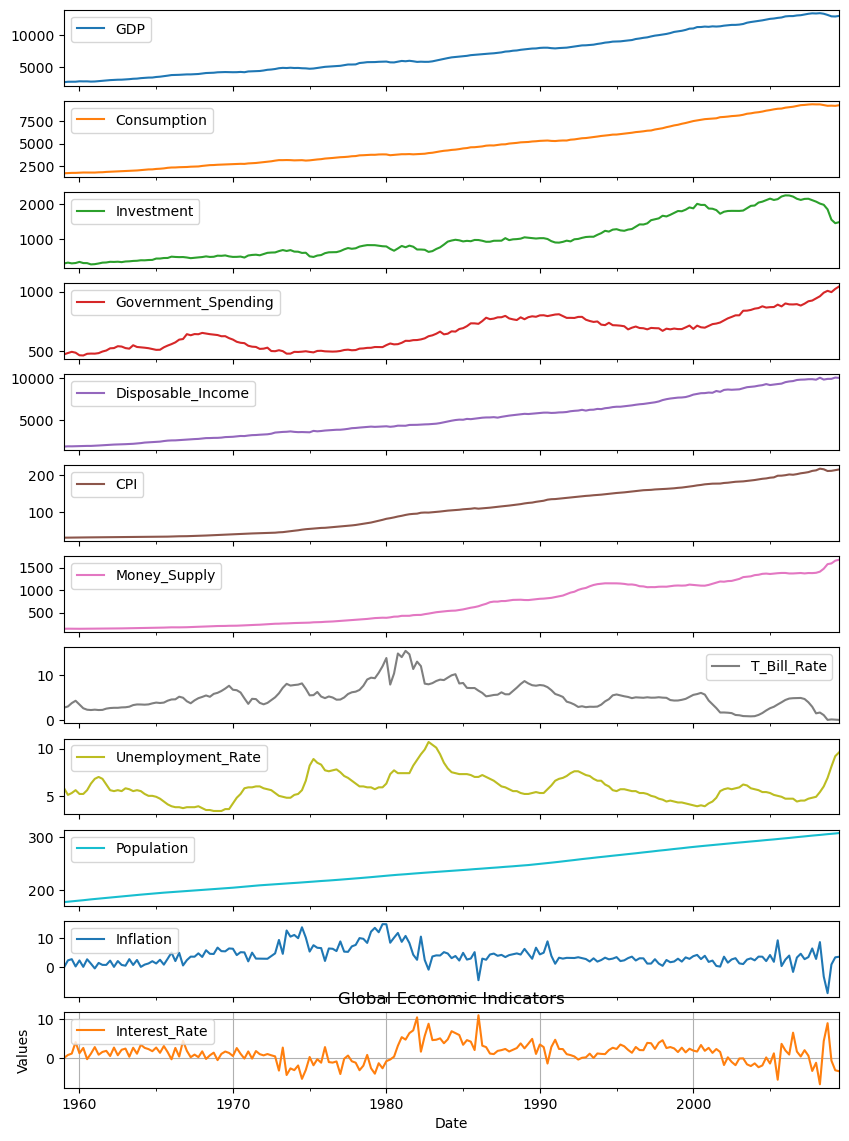

In [ ]:
df.plot(figsize=(10, 5))
df.plot(subplots=True, figsize=(10, 14))
plt.title('Global Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### 2. Data Preprocessing 
- Iterate over each variable to check for stationarity
- Preprocess the data to achieve stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def check_stationarity(df):   
    for column in df.columns:
        result = adfuller(df[column])
        print(f'\n{column} p-value Statistic: {result[1]}')
        if result[1] < 0.05:
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')

In [ ]:
# check stationarity of original data
check_stationarity(df) 


GDP p-value Statistic: 0.9982455372335032
GDP is not stationary

Consumption p-value Statistic: 0.9976992503412904
Consumption is not stationary

Investment p-value Statistic: 0.6484956579101142
Investment is not stationary

Government_Spending p-value Statistic: 0.9558411923961085
Government_Spending is not stationary

Disposable_Income p-value Statistic: 1.0
Disposable_Income is not stationary

CPI p-value Statistic: 0.9904328188337423
CPI is not stationary

Money_Supply p-value Statistic: 0.9987380758531885
Money_Supply is not stationary

T_Bill_Rate p-value Statistic: 0.2699177644226156
T_Bill_Rate is not stationary

Unemployment_Rate p-value Statistic: 0.10685366457233503
Unemployment_Rate is not stationary

Population p-value Statistic: 0.9982010738893761
Population is not stationary

Inflation p-value Statistic: 0.030107620863485937
Inflation is stationary

Interest_Rate p-value Statistic: 0.007161872494651806
Interest_Rate is stationary


In [ ]:
# differencing the data
df_diff = df.diff().dropna()

# check stationarity of differenced data
check_stationarity(df_diff)


GDP p-value Statistic: 3.327882187668259e-08
GDP is stationary

Consumption p-value Statistic: 0.000647928215862757
Consumption is stationary

Investment p-value Statistic: 4.297932808177111e-06
Investment is stationary

Government_Spending p-value Statistic: 0.0015716413194086796
Government_Spending is stationary

Disposable_Income p-value Statistic: 1.4493606159107938e-14
Disposable_Income is stationary

CPI p-value Statistic: 0.058918805578861574
CPI is not stationary

Money_Supply p-value Statistic: 0.00845296970535277
Money_Supply is stationary

T_Bill_Rate p-value Statistic: 1.3905825693348272e-07
T_Bill_Rate is stationary

Unemployment_Rate p-value Statistic: 0.0007447109360995936
Unemployment_Rate is stationary

Population p-value Statistic: 0.4749186842994227
Population is not stationary

Inflation p-value Statistic: 6.895349138508895e-30
Inflation is stationary

Interest_Rate p-value Statistic: 6.1073724612820596e-18
Interest_Rate is stationary


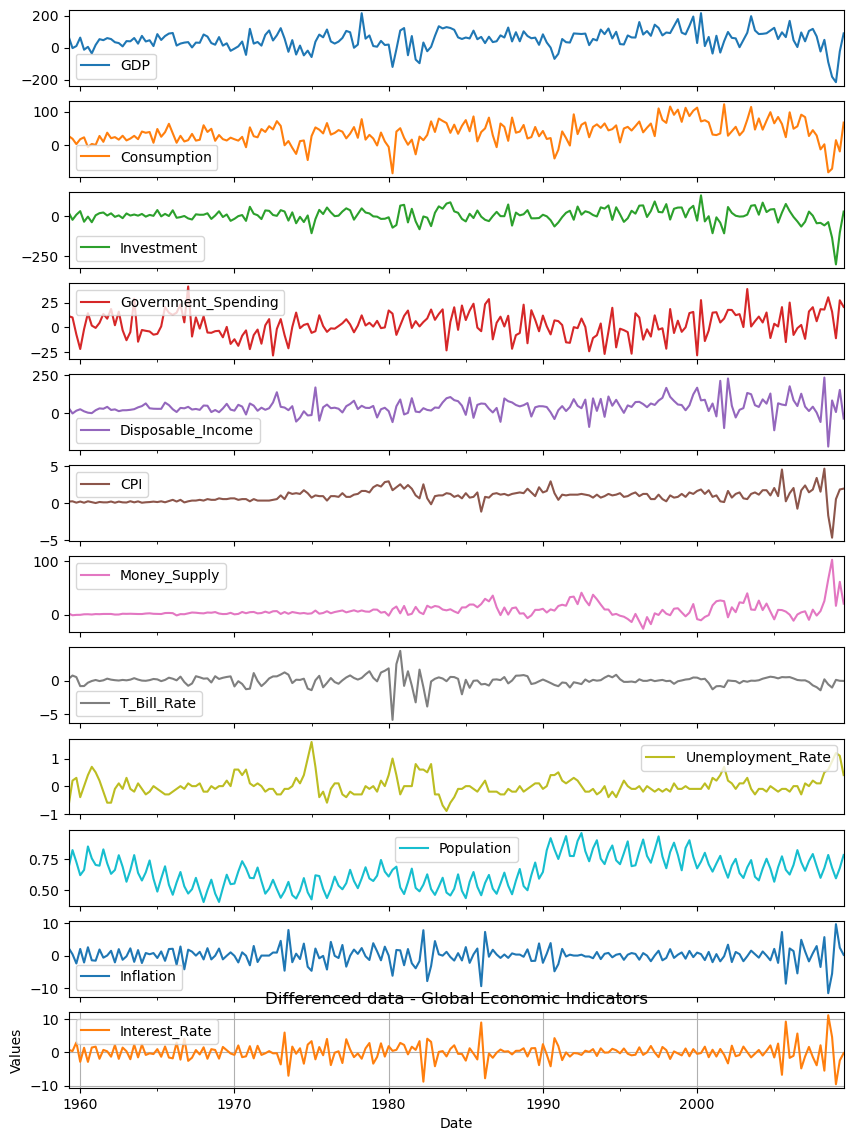

In [ ]:
df_diff.plot(subplots=True, figsize=(10, 14))
plt.title('Differenced data - Global Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### 3. Cross-Correlation and Granger Causality Analysis 
- Analyze the relationships between variables using cross-correlation and Granger causality.

#### Instructions for selecting predictors based on analysis:
1. Use cross-correlation to identify which variables show strong correlations at specific lags with your target variable 
2. Conduct Granger causality tests to verify if those correlated variables have predictive significance
3. Choose variables that have both strong correlations and significant Granger causality results as predictors for building your models

In [ ]:
from statsmodels.tsa.stattools import ccf, grangercausalitytests

#### Cross-correlation function
- Calculate cross-correlation between the target variable (GDP) and other variables to identify leading and lagging relationships.
- Examine the lag values where the correlation is highest to determine whether one variable can predict the target variable.
- Variables with strong correlations at specific lags can be considered as potential predictors.

In [ ]:
# Function to execute CCF on all variables (relative to defined target variable) and plot the results

def calculate_and_plot_ccf(data_df, interest_column, nlag=None):
    '''
    data_df: DataFrame, the dataset to be used
    interest_column: str, the column name of the variable of interest
    nlag: int, the number of lags to include in the cross-correlation function
    '''
    # Initialize an empty dictionary to store ccf values
    ccf_values = {}

    # Iterate over each column in the DataFrame except the interest column
    for column in data_df.drop(columns=interest_column).columns:
        
        # Calculate the cross-correlation and store it in the dictionary
        ccf_values[column] = ccf(data_df[interest_column], data_df[column], nlags=nlag)

        # Plot the cross-correlation as vertical lines
        plt.figure(figsize=(7, 2))
        lags = range(len(ccf_values[column]))  # Assuming ccf returns an array-like structure
        plt.vlines(lags, 0, ccf_values[column])
        plt.plot(lags, ccf_values[column], marker='o', linestyle='None')
        plt.title(f'Cross-correlation of {interest_column} with {column}')
        plt.xlabel('Lag')
        plt.ylabel('Cross-correlation')
        plt.show()

    # Create a DataFrame from the ccf_values
    ccf_df = pd.DataFrame(ccf_values)
    ccf_df.index.name = 'Lag'
    return ccf_df

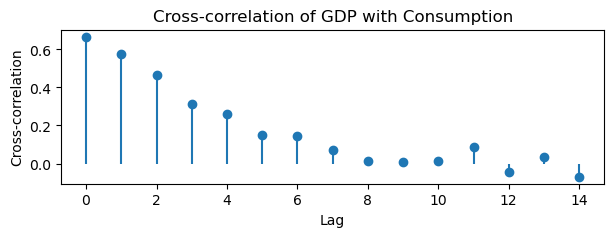

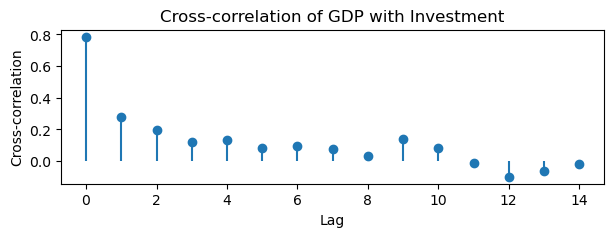

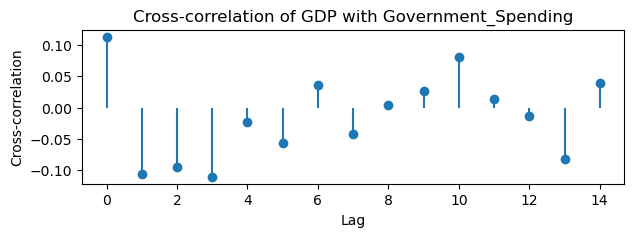

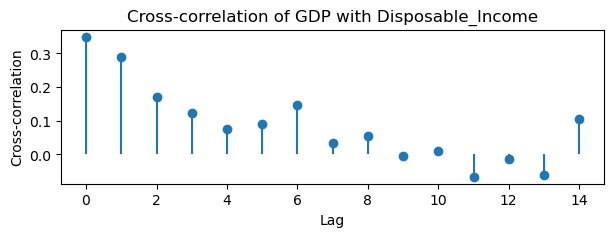

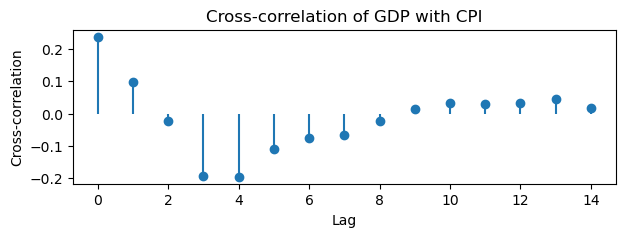

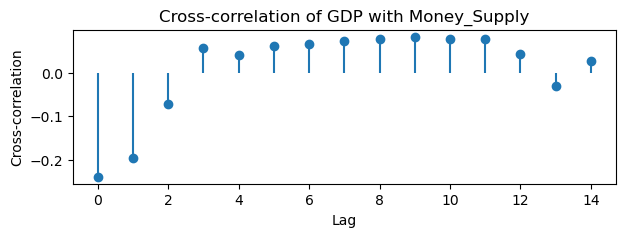

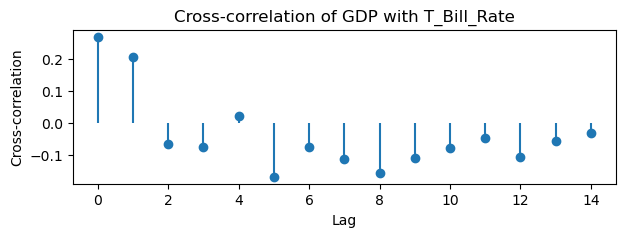

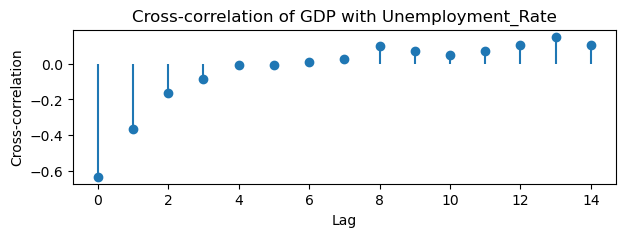

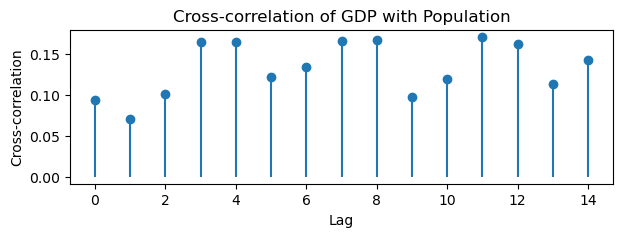

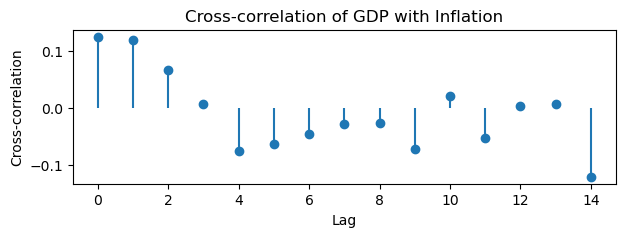

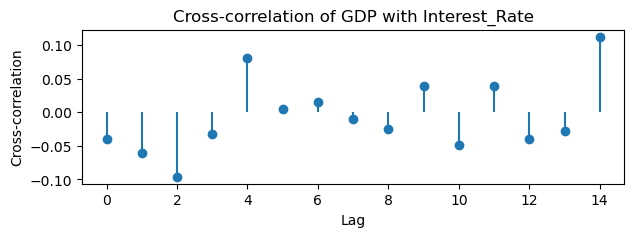

,Consumption,Investment,Government_Spending,Disposable_Income,CPI,Money_Supply,T_Bill_Rate,Unemployment_Rate,Population,Inflation,Interest_Rate
Lag,,,,,,,,,,,
0,0.666777,0.785891,0.113373,0.349683,0.237561,-0.239090,0.268816,-0.632161,0.094222,0.124387,-0.039866
1,0.575430,0.280919,-0.105825,0.288434,0.096514,-0.196374,0.204065,-0.363256,0.070693,0.118082,-0.061301
2,0.467486,0.197834,-0.095419,0.170196,-0.021550,-0.071396,-0.067376,-0.163615,0.101104,0.065641,-0.095961
3,0.314266,0.121661,-0.110576,0.123594,-0.194597,0.056628,-0.075943,-0.083578,0.164314,0.006634,-0.031605
4,0.260762,0.136522,-0.023041,0.076938,-0.195406,0.040638,0.019732,-0.009785,0.164680,-0.075892,0.081070
5,0.152433,0.081235,-0.056215,0.091656,-0.110230,0.061003,-0.169204,-0.006441,0.122254,-0.063261,0.005637
6,0.142271,0.092471,0.036074,0.146329,-0.075934,0.066488,-0.077340,0.006723,0.134486,-0.046484,0.014918
7,0.070201,0.074187,-0.041467,0.033988,-0.067820,0.073376,-0.113039,0.025135,0.166046,-0.029188,-0.010509
8,0.014905,0.030852,0.004746,0.055270,-0.023783,0.077466,-0.157923,0.099098,0.167739,-0.026274,-0.025022


In [ ]:
calculate_and_plot_ccf(df_diff, 'GDP', nlag=15)

##### Choosing Predictors:

- **'Consumption'** and ****'Investment'** should be prioritized based their strong positive correlations with GDP
- **'Unemployment_Rate'** can be considered to capture inverse relationships with GDP
- **'CPI'** (Consumer Price Index) has a relatively moderate and altering correlation at various lags. it might be useful as a supplementary predictor.

#### Granger Causality Test
##### Test whether one time series can predict another using the Granger causality test
- Run the Granger causality test to determine if one variable can be used to predict the target variable (GDP)
- The p-value will indicate whether the null hypothesis (no predictive power) can be rejected
- Select variables with low p-values (typically < 0.05) as potential predictors for the target variable

In [ ]:
# Function to plot Granger Causality test results

def test_granger_causality(data_set, target_column, test_column, num_lags, plot_fig , figsize=(7, 4)):
    # Perform Granger Causality test
    granger_test_result = grangercausalitytests(data_set[[target_column, test_column]], maxlag=num_lags, verbose=False)

    # set lags as a vector 1 to num_lags
    lags = range(1, num_lags + 1)   
    f_stats = [granger_test_result[lag][0]['ssr_ftest'][0] for lag in lags]
    p_values = [granger_test_result[lag][0]['ssr_ftest'][1] for lag in lags]

    if plot_fig:
        # plot the F-statistics and p-values seperatly on subplot
        fig, axes = plt.subplots(2, 1, figsize=figsize)

        axes[0].vlines(lags, 0, f_stats, color='blue')  # Draw vertical lines
        axes[0].plot(lags, f_stats, 'bo')
        axes[0].set_title(f'Granger Causality F-statistics for {test_column} causing {target_column}')
        axes[0].set_xlabel('Lag')
        axes[0].set_ylabel('F-statistic')
        axes[0].grid(True)

        axes[1].vlines(lags, 0, p_values, color='red')  # Draw vertical lines
        axes[1].plot(lags, p_values, 'ro')
        axes[1].set_title(f'Granger Causality p-values for {test_column} causing {target_column}')
        axes[1].set_xlabel('Lag')
        axes[1].set_ylabel('p-value')
        axes[1].axhline(y=0.05, color='green', linestyle='--')  # significance level
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

    return f_stats, p_values
    
# fnuction to get the df target column and itirate over all columns to get the granger causality test
# collect the results in a df with the p-values, rows as lags and columns as the test columns
def run_granger_causality(data_set, target_column, num_lags, plot_fig=True, figsize=(7, 4)):
    # Initialize an empty DataFrame to store the p-values
    p_values_df = pd.DataFrame()

    # Iterate over each column in the DataFrame
    for column in data_set.columns:
        if column != target_column:
            # Perform the Granger Causality test and store the p-values in the DataFrame
            f_stats, p_values = test_granger_causality(data_set, target_column, column, num_lags,plot_fig=plot_fig, figsize=figsize)
            p_values_df[f'{column}_pv'] = p_values

    p_values_df.index = range(1, num_lags + 1)
    p_values_df.index.name = 'Lag'
    
    return p_values_df

    

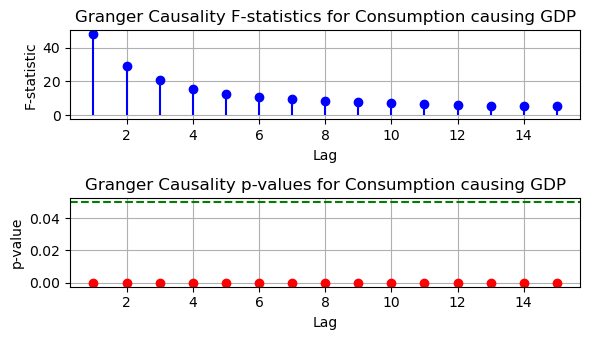

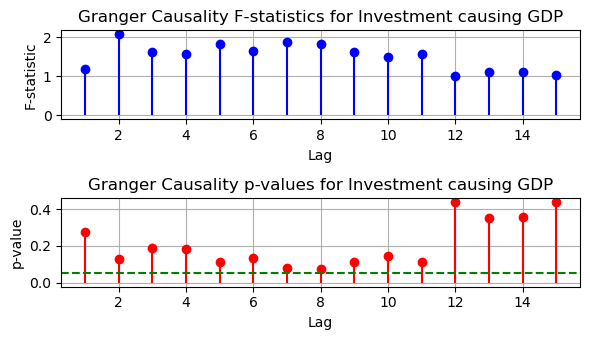

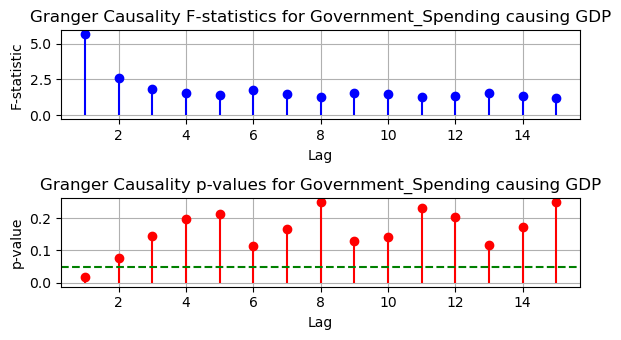

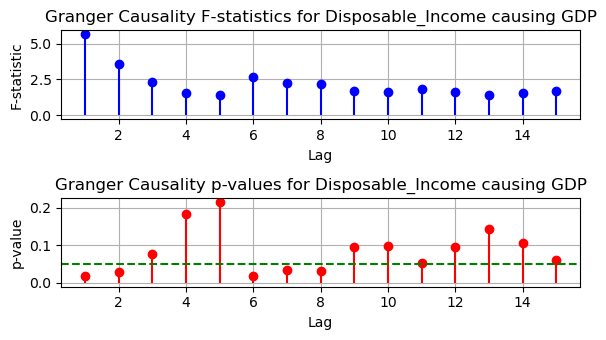

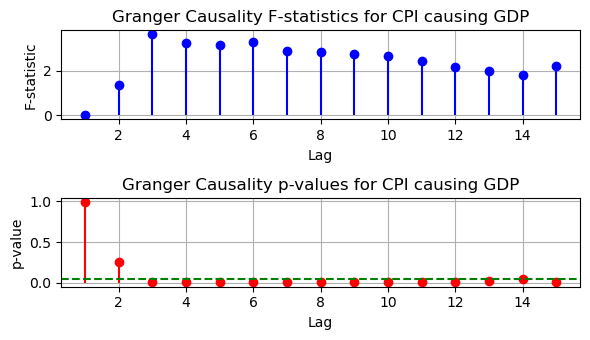

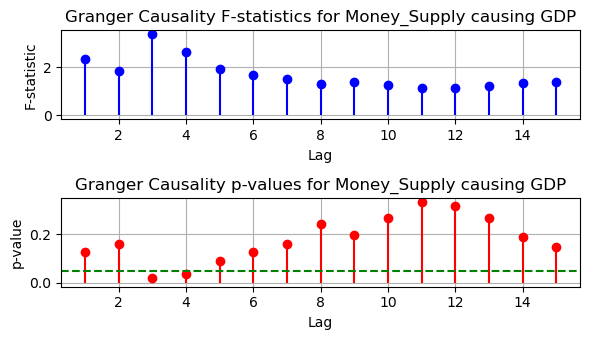

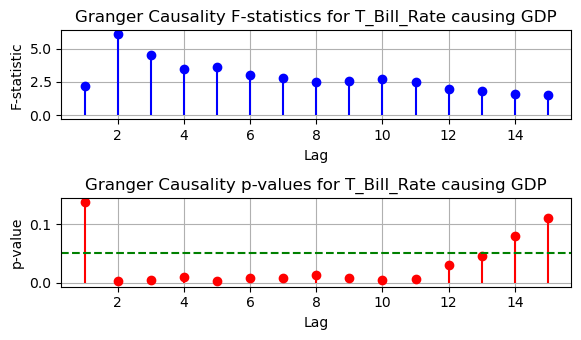

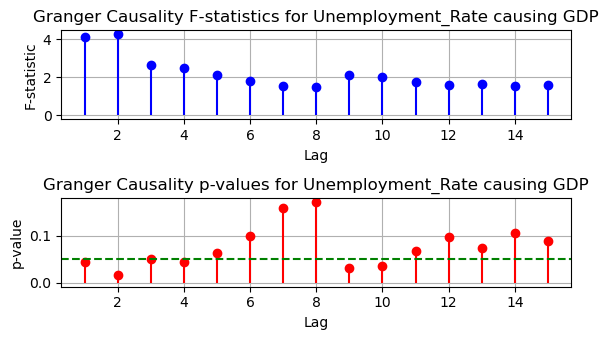

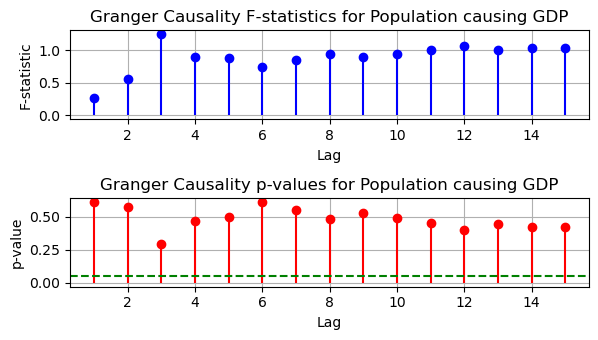

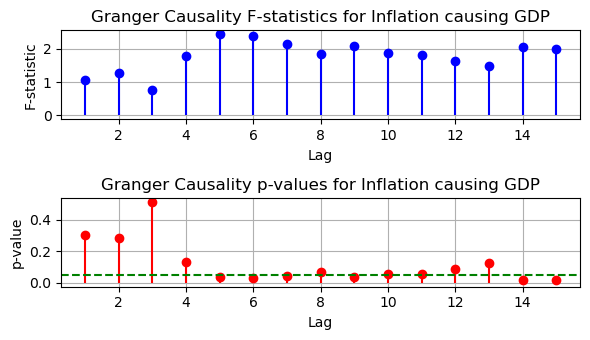

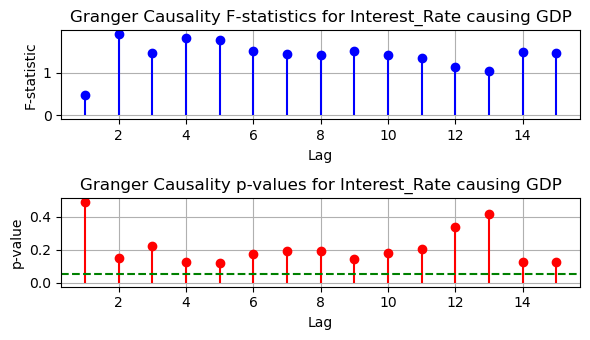

,Consumption_pv,Investment_pv,Government_Spending_pv,Disposable_Income_pv,CPI_pv,Money_Supply_pv,T_Bill_Rate_pv,Unemployment_Rate_pv,Population_pv,Inflation_pv,Interest_Rate_pv
Lag,,,,,,,,,,,
1,6.417335e-11,0.277835,0.018353,0.018358,0.995313,0.126162,0.138375,0.044078,0.608628,0.301728,0.490000
2,9.022616e-12,0.129151,0.076968,0.029904,0.255632,0.158473,0.002736,0.015432,0.573174,0.283790,0.151828
3,8.557842e-12,0.186706,0.144791,0.078068,0.013789,0.019148,0.004450,0.049715,0.295566,0.513388,0.222430
4,4.779596e-11,0.183637,0.196981,0.184885,0.013266,0.034353,0.008976,0.043821,0.469091,0.133214,0.127949
5,1.317820e-10,0.110545,0.211679,0.216351,0.009018,0.087703,0.003486,0.063567,0.497940,0.036270,0.122374
6,3.683192e-10,0.134792,0.112348,0.017259,0.004293,0.127504,0.007985,0.100253,0.611966,0.030248,0.173268
7,6.121234e-10,0.077847,0.164978,0.032941,0.006690,0.160796,0.008350,0.159204,0.550422,0.041362,0.191305
8,7.574662e-10,0.073477,0.248829,0.030108,0.005542,0.241083,0.013873,0.172244,0.485252,0.070872,0.190750
9,1.864929e-09,0.114957,0.128139,0.096491,0.004779,0.196569,0.007736,0.031304,0.527950,0.033287,0.144640


In [ ]:
granger_pv_results = run_granger_causality(df_diff, 'GDP', num_lags=15, figsize=(6, 3.5))
granger_pv_results

#### Variables to consider include in the VAR model:

1. **Consumption**
- Cross-Correlation Showed strong correlation at multiple lags.
- Granger Causality: Highly significant p-values across all lags 
- key predictor

2. **Government_Spending**
- Cross-Correlation: Moderate positive correlation 
- Granger Causality: P-values below 0.05 at multiple lags 
- Conclusion: also a significant predictor 

3. **CPI** (Consumer Price Index)
- Cross-Correlation: Moderate correlations at different lags
- Granger Causality: P-values below 0.05 at several lags 
Conclusion: CPI shows both correlation and causality, suitable as a predictor 

4. **Unemployment_Rate**
- Cross-Correlation: Negative correlation, indicating an inverse relationship
- Granger Causality: Significant p-values at multiple lags 
- Conclusion: useful as a predictor to capture the inverse impact on GDP


### 4. Cointegration Testing 
- Test for cointegration among the variables to identify long-term equilibrium relationships

#### Steps to follow:
1. Perform the Johansen cointegration test **on the original data** (with trends) to check if multiple variables have long-term relationships.
2. Evaluate the test statistics to determine if cointegration is present.

- Note: Perform the cointegration test on the original data (with trends) as cointegration analysis requires non-stationary data to identify equilibrium relationships

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
coint_results = coint_johansen(df, det_order=-1, k_ar_diff=10)
# print coin_johansen_results
print('trace statistic for all columns:', coint_results.lr1)
print('\ncritical values 90% 95% 99% of trace statistic:', coint_results.cvt)


trace statistic for all columns: [818.29256728 664.57784762 536.5502932  431.8476598  330.82794917
 257.89780998 190.47538893 132.29847309  77.54361538  42.45892985
  21.60249788   1.36495629]

critical values 90% 95% 99% of trace statistic: [[302.9054 311.1288 326.9716]
 [255.6732 263.2603 277.9962]
 [212.4721 219.4051 232.8291]
 [173.2292 179.5199 191.8122]
 [137.9954 143.6691 154.7977]
 [106.7351 111.7797 121.7375]
 [ 79.5329  83.9383  92.7136]
 [ 56.2839  60.0627  67.6367]
 [ 37.0339  40.1749  46.5716]
 [ 21.7781  24.2761  29.5147]
 [ 10.4741  12.3212  16.364 ]
 [  2.9762   4.1296   6.9406]]


#### Evaluate cointegration results
- If the test statistic is greater than the critical value, there is evidence of cointegration

1. Compare the trace statistics to the critical values at the 95% level 
2. If the trace statistic exceeds the critical value, there is evidence of cointegration
3. Select the variables that are cointegrated with the target variable that may be included in the VECM model

In [ ]:
def evaluate_cointegration(coint_result, data_df):
    trace_stat_critical_values = coint_result.cvt[:, 1]  # Critical values at 5% level
    cointegrated_vars = []
    for i, stat in enumerate(coint_result.lr1):
        if stat > trace_stat_critical_values[i]:
            print(f'Cointegration relationship found for rank {i+1}')
            cointegrated_vars.append(data_df.columns[i])
        else:
            print(f'No cointegration relationship found for rank {i+1}')
    return cointegrated_vars

# Run the cointegration test and get the cointegrated variables
cointegrated_variables = evaluate_cointegration(coint_result, df)
print('\n Cointegrated Variables:', cointegrated_variables)


Cointegration relationship found for rank 1
Cointegration relationship found for rank 2
Cointegration relationship found for rank 3
Cointegration relationship found for rank 4
Cointegration relationship found for rank 5
Cointegration relationship found for rank 6
Cointegration relationship found for rank 7
Cointegration relationship found for rank 8
Cointegration relationship found for rank 9
Cointegration relationship found for rank 10
Cointegration relationship found for rank 11
No cointegration relationship found for rank 12

 Cointegrated Variables: ['GDP', 'Consumption', 'Investment', 'Government_Spending', 'Disposable_Income', 'CPI', 'Money_Supply', 'T_Bill_Rate', 'Unemployment_Rate', 'Population', 'Inflation']


- The output suggests that almost all the variables are cointegrated with GDP, however including all of them in the VECM model might make it overly complex
- We canse the Granger causality test results (of original data) to identify which variables have better predictive power

In [ ]:
granger_pv_results = run_granger_causality(df, 'GDP', num_lags=10, plot_fig=False, figsize=(6, 3.5))
granger_pv_results

,Consumption_pv,Investment_pv,Government_Spending_pv,Disposable_Income_pv,CPI_pv,Money_Supply_pv,T_Bill_Rate_pv,Unemployment_Rate_pv,Population_pv,Inflation_pv,Interest_Rate_pv
Lag,,,,,,,,,,,
1,6.674629e-01,0.096562,0.045177,0.832048,0.278619,0.081786,0.237872,0.513416,0.021331,0.205411,0.770650
2,1.134194e-09,0.791982,0.026642,0.061901,0.410861,0.005456,0.064298,0.008905,0.033686,0.057284,0.553047
3,9.596591e-12,0.236101,0.091028,0.027571,0.097321,0.019300,0.004039,0.009443,0.048815,0.018017,0.117800
4,7.291351e-12,0.332827,0.123910,0.085211,0.001731,0.008112,0.007349,0.021030,0.049806,0.026843,0.105406
5,4.995835e-11,0.215507,0.174277,0.146562,0.000327,0.014551,0.013153,0.028344,0.053524,0.036256,0.105726
6,2.709166e-10,0.113963,0.177224,0.262529,0.000634,0.034400,0.008271,0.034517,0.129623,0.021147,0.118612
7,6.896399e-10,0.102843,0.086428,0.026849,0.000918,0.055545,0.014953,0.062171,0.200418,0.025112,0.177451
8,1.362228e-09,0.038531,0.127250,0.052483,0.001240,0.065368,0.016846,0.115452,0.246287,0.031022,0.193379
9,3.473999e-09,0.024698,0.176662,0.068823,0.001597,0.097867,0.032131,0.165875,0.261983,0.059614,0.160854


#### Choosing predictors for VECM model

From the information above and the economic relevance we can cosider using:

1. **Consumption**: highly correlated with GDP and economically significant
2. **Investment**: Typically a good predictor of economic growth
3. **Unemployment_Rate**: Has an inverse relationship with economic activity and significant p_vales
4. **CPI**: Reflects inflation, which affects purchasing power. Low p_values at later lags
5. **Disposable_Income**: Reflects consumer spending capability.

### 5. Building and Evaluating a VAR Model 
- Use **Stationary** data, if necessary use pre-processing (in this case Differenced data)
- Use the target variable and other economic indicators as potential predictors
- Split data into training and testing sets- Use most of the data for training and leave a small portion for testing
- Fit model and select the optimal lag order by using statistical criteria such as AIC, BIC, FPE, and HQIC
- Train the VAR model with the selected lag order and Forcast future values (test length)
- Evaluate model performance, compare the forecasted values to the actual values from the test set and calculate evaluation metric (such as RMSE)




In [ ]:
from statsmodels.tsa.api import VAR

#### Train Test Split

In [ ]:
# Selecting the variables for VAR model
# According to the CCF and Granger Causality test results
var_df= df_diff[['GDP', 'Consumption', 'Government_Spending', 'Unemployment_Rate']] 

In [ ]:
# Split the data into train and test sets based on specified proportion
def split_data(df, test_prop= 0.15):

    test_size = int(test_prop * len(df))
    train, test = df[:-test_size], df[-test_size:]

    print('train shape:', train.shape)
    print('test shape:', test.shape)
    print('split Date:', train.index.max())
    return train, test, test_size

In [ ]:
train, test, test_size = split_data(var_df, test_prop=0.2)

train shape: (162, 4)
test shape: (40, 4)
split Date: 1999Q3


#### Fit the VAR model and Select lag order

In [ ]:
# Fit the VAR model with the training data
# Use Real_GDP as the target variable and other economic indicators as potential predictors.
model = VAR(train)
lag_orders = model.select_order(maxlags=10)
print(lag_orders.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        16.40       16.48   1.320e+07       16.43
1        15.73      16.13*   6.815e+06      15.90*
2        15.70       16.42   6.589e+06       15.99
3       15.68*       16.71  6.454e+06*       16.10
4        15.72       17.07   6.735e+06       16.27
5        15.83       17.50   7.537e+06       16.51
6        15.94       17.93   8.505e+06       16.75
7        15.97       18.28   8.801e+06       16.91
8        16.00       18.63   9.150e+06       17.07
9        16.07       19.02   9.933e+06       17.27
10       16.20       19.46   1.148e+07       17.53
--------------------------------------------------


#### Train the VAR model with the selected lag order and Evaluate model performance

In [ ]:
# Function to fit the VAR model, forecast the target variable, calculate RMSE and plot the forecasted values
def VAR_forecast_and_plot(model, train, test, target_variable, lag_order, test_size):
    # Fit the VAR model
    var_model = model.fit(lag_order)
    
    # Forecast using the VAR model
    forecast_values = var_model.forecast(train.values[-lag_order:], steps=test_size)
    forecast_df = pd.DataFrame(forecast_values, index=test.index, columns=train.columns)
    
    # Calculate the RMSE for target variable
    rmse = np.sqrt(mean_squared_error(test[target_variable], forecast_df[target_variable]))
    print(f'RMSE for {target_variable} with Lag {lag_order}: {rmse}')
    
    # Plot the forecasted values
    plt.figure(figsize=(7, 3))
    #train[target_variable].plot(label='Train')
    test[target_variable].plot(label='Test')
    forecast_df[target_variable].plot(label='Forecast')
    plt.title(f'Forecasted {target_variable} values')
    plt.legend()
    plt.show()

    return forecast_df, rmse

RMSE for GDP with Lag 2: 83.46589947475427


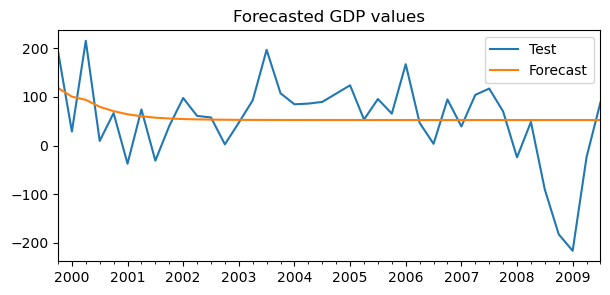

RMSE for GDP with Lag 4: 85.4417941270263


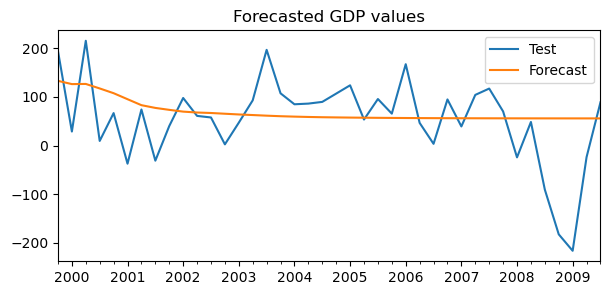

RMSE for GDP with Lag 6: 88.12806814975613


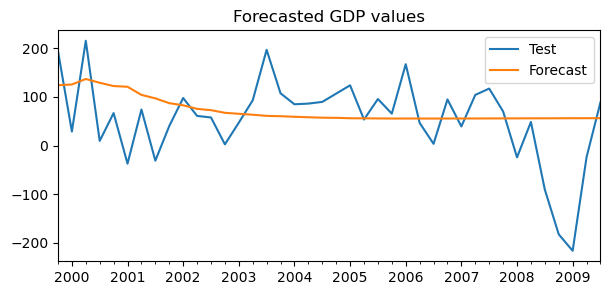

RMSE for GDP with Lag 8: 99.22459003584095


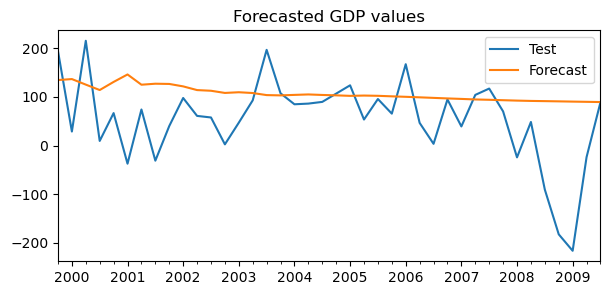

RMSE for GDP with Lag 10: 107.90347031227357


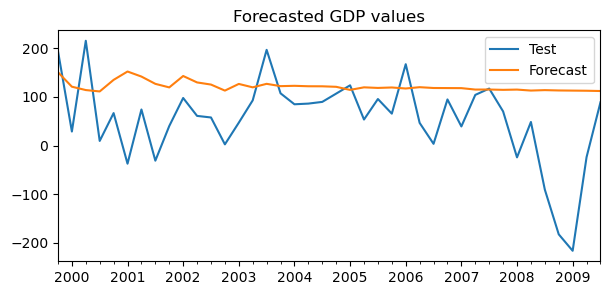

RMSE for GDP with Lag 12: 131.2660897016461


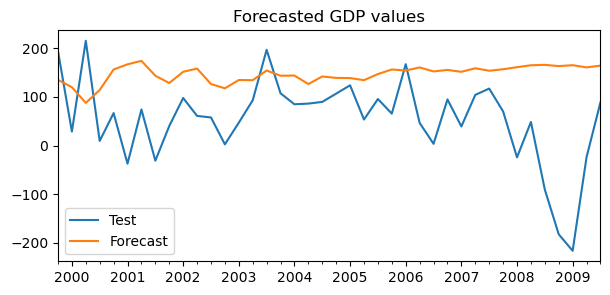

,Lag_Order,RMSE
0,2,83.465899
1,4,85.441794
2,6,88.128068
3,8,99.224590
4,10,107.903470
5,12,131.266090


In [ ]:
# iterate over lag orders to get the RMSE for each lag order
rmse_results = pd.DataFrame(columns=['Lag_Order', 'RMSE'])
for lag_order in [2, 4, 6, 8, 10, 12]:
    forecast_df, rmse = VAR_forecast_and_plot(model, train, test, 'GDP', lag_order=lag_order, test_size=test_size)
    rmse_results = pd.concat([rmse_results, pd.DataFrame({'Lag_Order': [lag_order], 'RMSE': [rmse]})], ignore_index=True)

rmse_results

### 6. Fitting a VECM Model
#### Fit a Vector Error Correction Model (VECM) for cointegrated variables
- The VECM model should be fitted on the original non-stationary data, as it models the long-term equilibrium relationships
- Select the identified cointegration variables to fit the VECM model
- Fit the VECM model on the selected train set and forcast future values. Expirement with different variable selection, co-int ranks and lag orders to get the best RMSE
- Evaluate model performance, compare the forecasted values to the actual values from the test set and calculate evaluation metric (such as RMSE)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM

#### Train Test Split

In [ ]:
# Selecting the variables for VECM model
# According to the cointegration test and Granger Causality test results
vecm_df= df[['GDP', 'Consumption', 'Unemployment_Rate', 'CPI', 'Disposable_Income']] 

In [ ]:
train, test, test_size = split_data(vecm_df, test_prop=0.2)

train shape: (163, 5)
test shape: (40, 5)
split Date: 1999Q3


#### Fit the VECM model on the selected train set and forcast future values

RMSE for GDP with Lag 3, Rank 4: 433.42028131942715


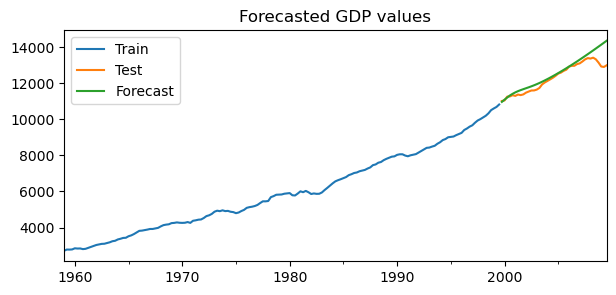

In [ ]:
target_variable = 'GDP'
lag_order = 3
cointegration_rank = 4

# Fit the VECM model using the selected variables
vecm_model = VECM(train, k_ar_diff=lag_order, coint_rank=cointegration_rank)
vecm_fitted = vecm_model.fit()

# Forecast using the fitted VECM model
forecast_values_vecm = vecm_fitted.predict(steps=len(test))
forecast_df_vecm = pd.DataFrame(forecast_values_vecm, index=test.index, columns=train.columns)

# Calculate the RMSE for target variable
rmse = np.sqrt(mean_squared_error(test[target_variable], forecast_df_vecm[target_variable]))
print(f'RMSE for {target_variable} with Lag {lag_order}, Rank {cointegration_rank}: {rmse}')

# Plot the forecasted values
plt.figure(figsize=(7, 3))
train[target_variable].plot(label='Train')
test[target_variable].plot(label='Test')
forecast_df_vecm[target_variable].plot(label='Forecast')
plt.title(f'Forecasted {target_variable} values')
plt.legend()
plt.show()



### 7. Exploring ARIMAX with Exogenous Variables
- Fit an ARIMAX model with external variables as predictors
- Select the target variable and choose external variables- rely on domain knowledge to identify variables that are practically important, Use statistical tests to determine which variables have strong relationships with GDP
- Selecet model parameters and fit ARIMAX model
- predict future results and evaluate model performance
- Expiriment with different combination of external variables to - try gradually removing variables that do not contribute significantly to the model to find the most efective predictor variables

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Prepare the data- Select External Variables and Split train test sets

In [ ]:
# Define target and exogenous variables (climate features as exogenous variables)
target_variable = 'GDP'
exogenous_variables = ['Consumption', 'Unemployment_Rate', 'CPI', 'Disposable_Income']

In [ ]:
# split to train and test
train, test, test_size = split_data(df, test_prop=0.2)

# Define target and exogenous for training and testing
y_train = train[target_variable]
x_train = train[exogenous_variables]
y_test = test[target_variable]
x_test = test[exogenous_variables]

train shape: (163, 12)
test shape: (40, 12)
split Date: 1999Q3


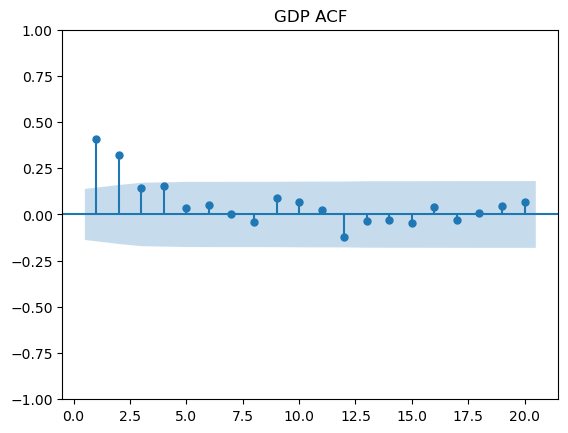

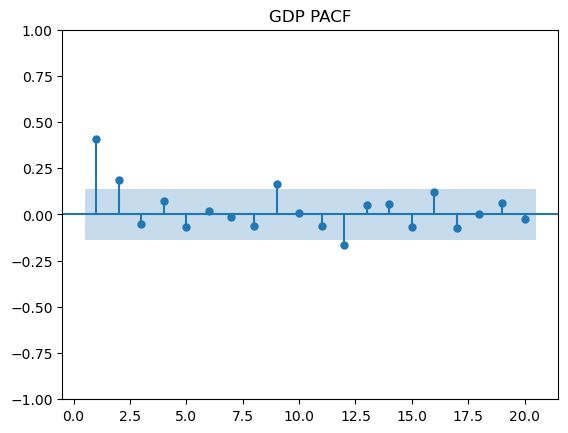

In [ ]:
# Plot ACF and PACF for PM2.5
plot_acf(df_diff['GDP'], lags=20, zero=False)
plt.title('GDP ACF')
plt.show()

plot_pacf(df_diff['GDP'], lags=20, zero=False)
plt.title('GDP PACF')
plt.show()

RMSE for GDP using ARIMAX: 231.11998196906072


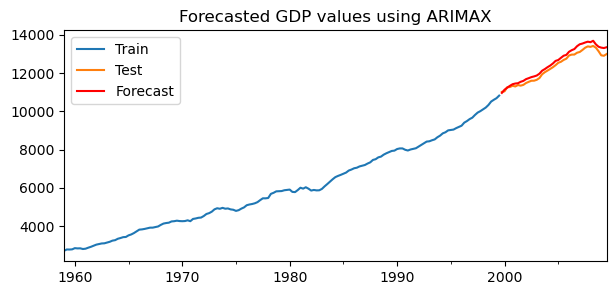

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMAX model with exogenous variables using ARIMA
arimax_model = ARIMA(y_train, exog=x_train, order=(2, 1, 2))
arimax_result = arimax_model.fit()

# Forecast using the ARIMAX model
forecast_values_arimax = arimax_result.forecast(steps=test_size, exog=x_test)

# Calculate the RMSE for target variable
rmse = np.sqrt(mean_squared_error(y_test, forecast_values_arimax))
print(f'RMSE for {target_variable} using ARIMAX: {rmse}')

# Plot the forecasted values
plt.figure(figsize=(7, 3))
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, forecast_values_arimax, label='Forecast', color='red')
plt.title(f'Forecasted {target_variable} values using ARIMAX')
plt.legend()
plt.show()



In [ ]:
# Use auto_arima to find the best ARIMA model
auto_arima_model = auto_arima(y_train, exogenous=x_train, seasonal=False, stepwise=True, trace=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1762.819, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1732.134, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1713.962, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1760.828, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1712.231, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1706.092, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1730.158, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1705.011, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1725.236, Time=0.01 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1706.997, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1706.991, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  163
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -848.506
Date:                Thu, 24 Oct 2024   AIC                           1705.011
Time:                        15:28:38   BIC                           1717.337
Sample:                    03-31-1959   HQIC                          1710.016
                         - 09-30-1999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2778      0.084      3.316      0.001       0.114       0.442
ar.L2          0.1437      0.075      1.925      0.054      -0.003       0.290
ma.L1         -0.9619      0.042    -22.988      0.000      -1.044      -0.880
sigma2      2188.2382    186.800     11.714      0.000    1822.116    2554.360
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                17.20
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.00
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE for GDP using ARIMAX: 148.9847355827404


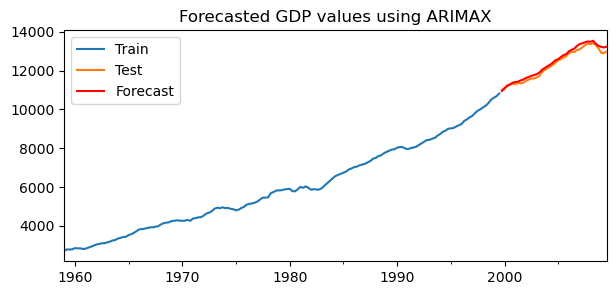

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMAX model with exogenous variables using ARIMA
arimax_model = ARIMA(y_train, exog=x_train, order=(2, 2, 1))
arimax_result = arimax_model.fit()

# Forecast using the ARIMAX model
forecast_values_arimax = arimax_result.forecast(steps=test_size, exog=x_test)

# Calculate the RMSE for target variable
rmse = np.sqrt(mean_squared_error(y_test, forecast_values_arimax))
print(f'RMSE for {target_variable} using ARIMAX: {rmse}')

# Plot the forecasted values
plt.figure(figsize=(7, 3))
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, forecast_values_arimax, label='Forecast', color='red')
plt.title(f'Forecasted {target_variable} values using ARIMAX')
plt.legend()
plt.show()

## Lecture 4 Coding Exercise: Multivariate Time Series Analysis - Example Solution

### Objectives:

- Understand relationships and dependencies in multivariate time series data
- Apply Granger causality, Vector Autoregression (VAR), and Vector Error Correction Model (VECM)
- Fit ARIMAX models with exogenous variables
- Compare and evaluate the performance of different models

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import datasets
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### 1. Load and Explore the Dataset
 Load the dataset and visualize key variables to understand their trends over time

#### **Load and prepare the time series dataset**.

   - Load a real-life multivariate time series dataset, the variables should have a trend and an expected relationships between them 
   - Handle any missing values and set the appropriate frequency for the dataset
   - The **"Global Economic Data"** dataset is provided as an example solution - The target variable is **'GDP'** (Gross Domestic Product) to understand how different components of the economy contribute to overall growth

In [33]:
# Load the dataset
df = datasets.macrodata.load_pandas().data

# Convert year and quarter to integers
df['year'] = df['year'].astype(int)
df['quarter'] = df['quarter'].astype(int)

# Use the year and quarter columns to create a new index with specified frequency
df.index = pd.PeriodIndex(year=df['year'], quarter=df['quarter'], freq='Q')

# Display the dataframe
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### Orgenize column & Handle missing data

In [34]:
# Remove the year and quarter columns
df.drop(columns=['year', 'quarter'], inplace=True)

# Rename columns to easy-to-understand names
df.rename(columns={
    'realgdp': 'GDP',
    'realcons': 'Consumption',
    'realinv': 'Investment',
    'realgovt': 'Government_Spending',
    'realdpi': 'Disposable_Income',
    'cpi': 'CPI',
    'm1': 'Money_Supply',
    'tbilrate': 'T_Bill_Rate',
    'unemp': 'Unemployment_Rate',
    'pop': 'Population',
    'infl': 'Inflation',
    'realint': 'Interest_Rate'
}, inplace=True)

# Count missing values
print('number of missing values', df.isnull().sum(), '\n\n')

df.info()

number of missing values GDP                    0
Consumption            0
Investment             0
Government_Spending    0
Disposable_Income      0
CPI                    0
Money_Supply           0
T_Bill_Rate            0
Unemployment_Rate      0
Population             0
Inflation              0
Interest_Rate          0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 203 entries, 1959Q1 to 2009Q3
Freq: Q-DEC
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GDP                  203 non-null    float64
 1   Consumption          203 non-null    float64
 2   Investment           203 non-null    float64
 3   Government_Spending  203 non-null    float64
 4   Disposable_Income    203 non-null    float64
 5   CPI                  203 non-null    float64
 6   Money_Supply         203 non-null    float64
 7   T_Bill_Rate          203 non-null    float64
 8   Unemployment_Rate    203 non

#### plot the data and inspect patterns visually

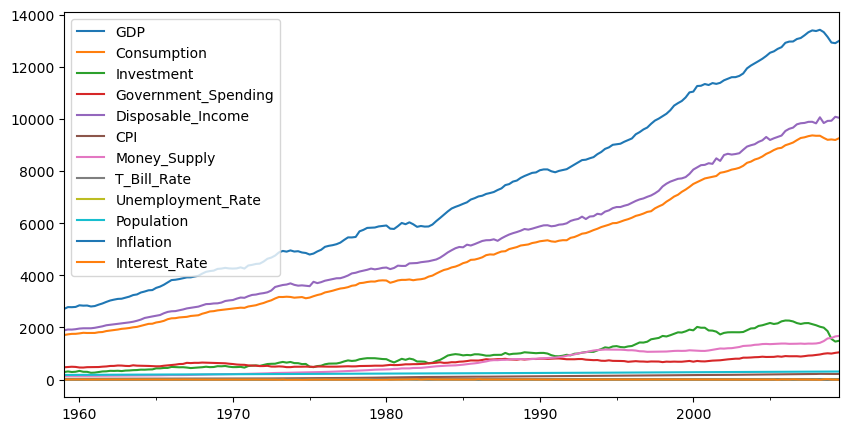

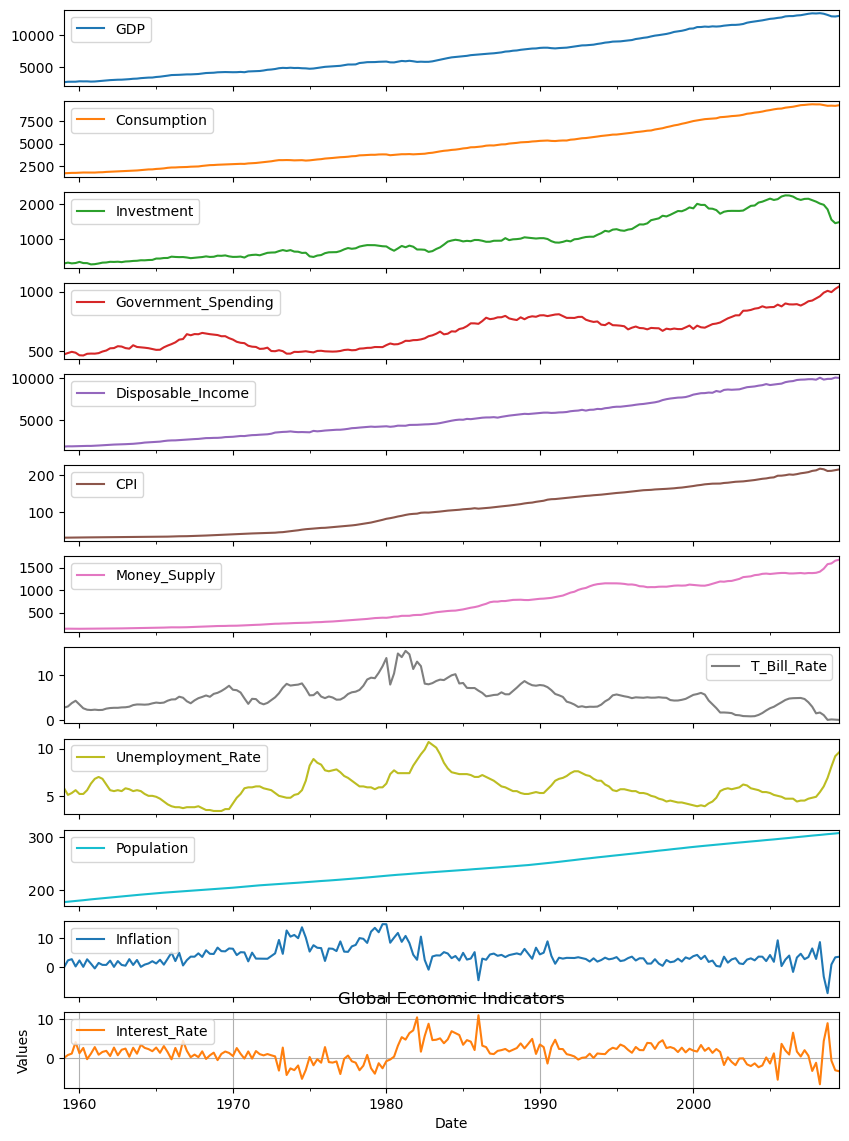

In [35]:
df.plot(figsize=(10, 5))
df.plot(subplots=True, figsize=(10, 14))
plt.title('Global Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### 2. Data Preprocessing 
- Iterate over each variable to check for stationarity
- Preprocess the data to achieve stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
def check_stationarity(df):   
    for column in df.columns:
        result = adfuller(df[column])
        print(f'\n{column} p-value Statistic: {result[1]}')
        if result[1] < 0.05:
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')

In [38]:
# check stationarity of original data
check_stationarity(df) 


GDP p-value Statistic: 0.9982455372335032
GDP is not stationary

Consumption p-value Statistic: 0.9976992503412904
Consumption is not stationary

Investment p-value Statistic: 0.6484956579101142
Investment is not stationary

Government_Spending p-value Statistic: 0.9558411923961085
Government_Spending is not stationary

Disposable_Income p-value Statistic: 1.0
Disposable_Income is not stationary

CPI p-value Statistic: 0.9904328188337423
CPI is not stationary

Money_Supply p-value Statistic: 0.9987380758531885
Money_Supply is not stationary

T_Bill_Rate p-value Statistic: 0.2699177644226156
T_Bill_Rate is not stationary

Unemployment_Rate p-value Statistic: 0.10685366457233503
Unemployment_Rate is not stationary

Population p-value Statistic: 0.9982010738893761
Population is not stationary

Inflation p-value Statistic: 0.030107620863485937
Inflation is stationary

Interest_Rate p-value Statistic: 0.007161872494651806
Interest_Rate is stationary


In [39]:
# differencing the data
df_diff = df.diff().dropna()

# check stationarity of differenced data
check_stationarity(df_diff)


GDP p-value Statistic: 3.327882187668259e-08
GDP is stationary

Consumption p-value Statistic: 0.000647928215862757
Consumption is stationary

Investment p-value Statistic: 4.297932808177111e-06
Investment is stationary

Government_Spending p-value Statistic: 0.0015716413194086796
Government_Spending is stationary

Disposable_Income p-value Statistic: 1.4493606159107938e-14
Disposable_Income is stationary

CPI p-value Statistic: 0.058918805578861574
CPI is not stationary

Money_Supply p-value Statistic: 0.00845296970535277
Money_Supply is stationary

T_Bill_Rate p-value Statistic: 1.3905825693348272e-07
T_Bill_Rate is stationary

Unemployment_Rate p-value Statistic: 0.0007447109360995936
Unemployment_Rate is stationary

Population p-value Statistic: 0.4749186842994227
Population is not stationary

Inflation p-value Statistic: 6.895349138508895e-30
Inflation is stationary

Interest_Rate p-value Statistic: 6.1073724612820596e-18
Interest_Rate is stationary


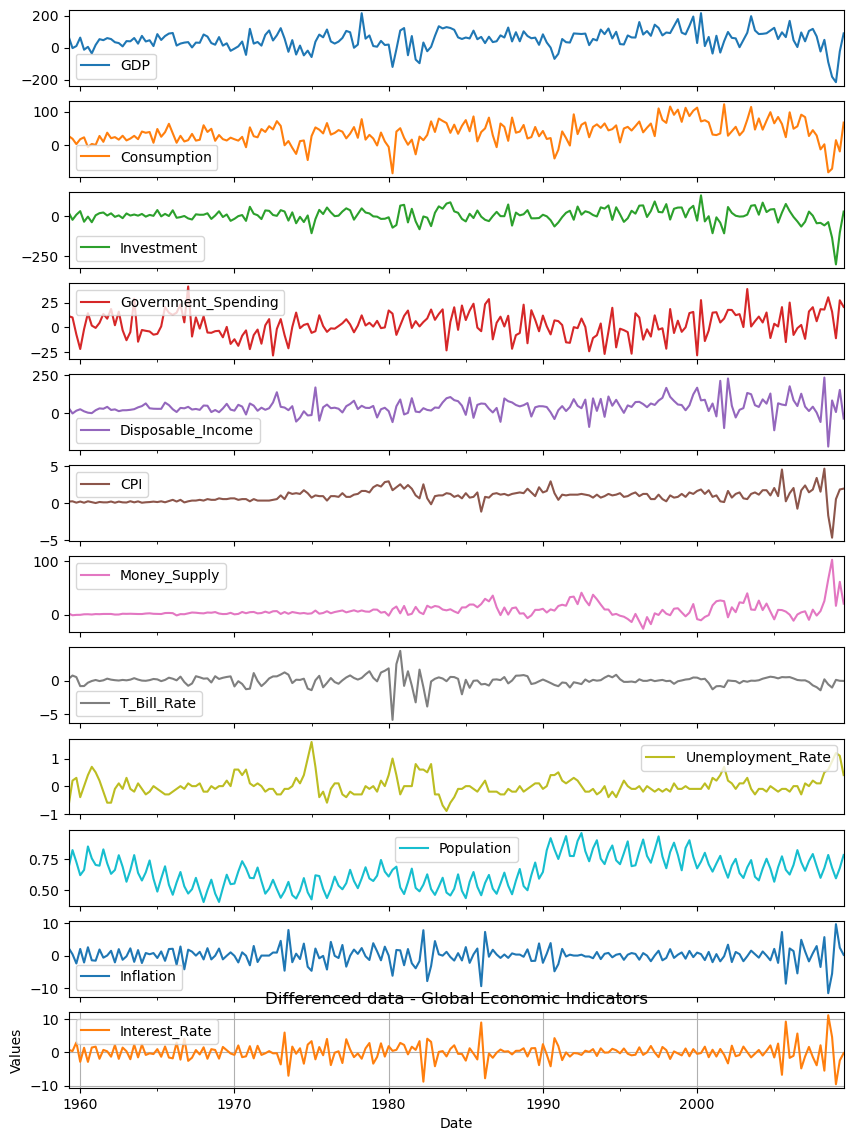

In [40]:
df_diff.plot(subplots=True, figsize=(10, 14))
plt.title('Differenced data - Global Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### 3. Cross-Correlation and Granger Causality Analysis 
- Analyze the relationships between variables using cross-correlation and Granger causality.

#### Instructions for selecting predictors based on analysis:
1. Use cross-correlation to identify which variables show strong correlations at specific lags with your target variable 
2. Conduct Granger causality tests to verify if those correlated variables have predictive significance
3. Choose variables that have both strong correlations and significant Granger causality results as predictors for building your models

In [41]:
from statsmodels.tsa.stattools import ccf, grangercausalitytests

#### Cross-correlation function
- Calculate cross-correlation between the target variable (GDP) and other variables to identify leading and lagging relationships.
- Examine the lag values where the correlation is highest to determine whether one variable can predict the target variable.
- Variables with strong correlations at specific lags can be considered as potential predictors.

In [42]:
# Function to execute CCF on all variables (relative to defined target variable) and plot the results

def calculate_and_plot_ccf(data_df, interest_column, nlag=None):
    '''
    data_df: DataFrame, the dataset to be used
    interest_column: str, the column name of the variable of interest
    nlag: int, the number of lags to include in the cross-correlation function
    '''
    # Initialize an empty dictionary to store ccf values
    ccf_values = {}

    # Iterate over each column in the DataFrame except the interest column
    for column in data_df.drop(columns=interest_column).columns:
        
        # Calculate the cross-correlation and store it in the dictionary
        ccf_values[column] = ccf(data_df[interest_column], data_df[column], nlags=nlag)

        # Plot the cross-correlation as vertical lines
        plt.figure(figsize=(7, 2))
        lags = range(len(ccf_values[column]))  # Assuming ccf returns an array-like structure
        plt.vlines(lags, 0, ccf_values[column])
        plt.plot(lags, ccf_values[column], marker='o', linestyle='None')
        plt.title(f'Cross-correlation of {interest_column} with {column}')
        plt.xlabel('Lag')
        plt.ylabel('Cross-correlation')
        plt.show()

    # Create a DataFrame from the ccf_values
    ccf_df = pd.DataFrame(ccf_values)
    ccf_df.index.name = 'Lag'
    return ccf_df

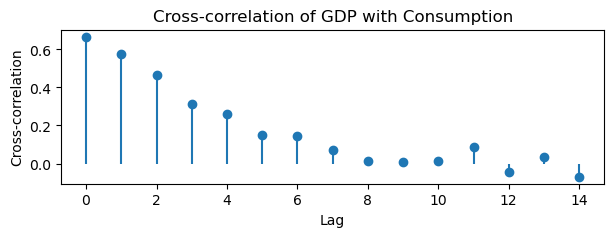

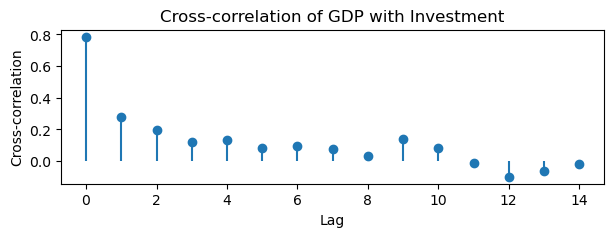

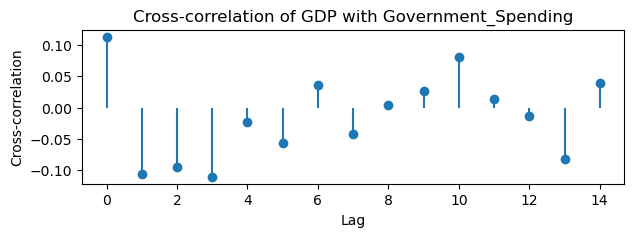

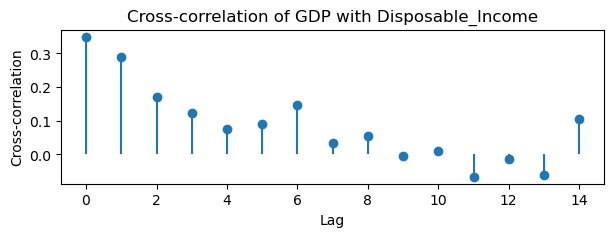

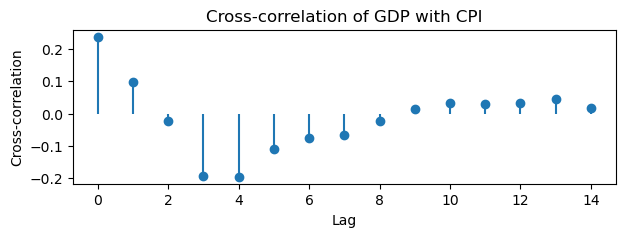

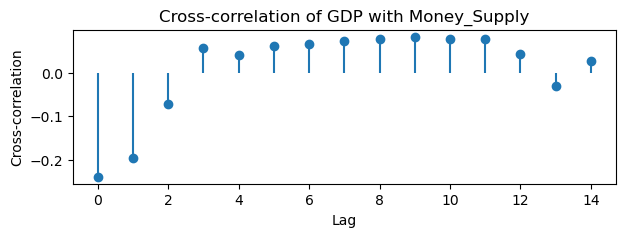

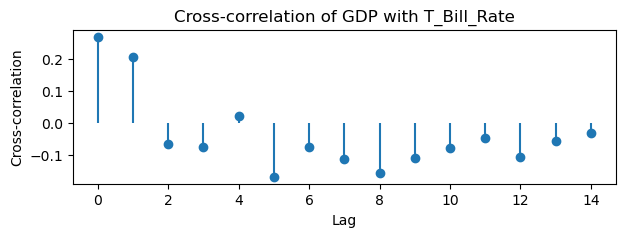

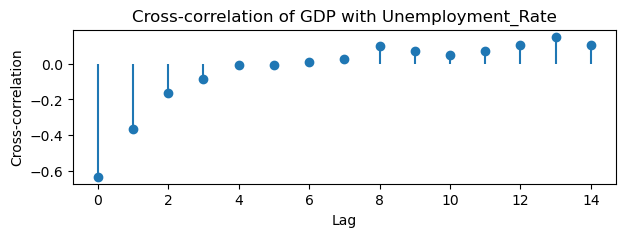

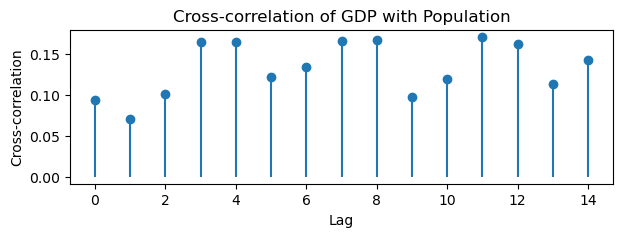

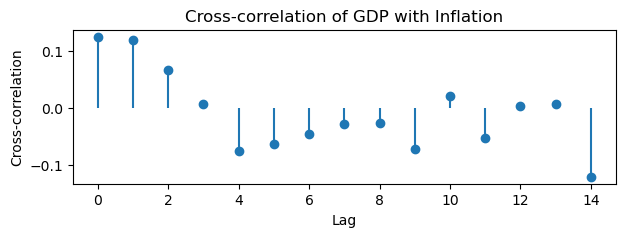

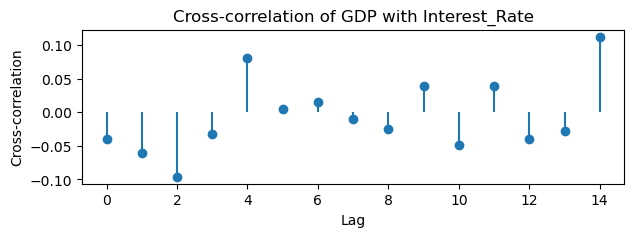

,Consumption,Investment,Government_Spending,Disposable_Income,CPI,Money_Supply,T_Bill_Rate,Unemployment_Rate,Population,Inflation,Interest_Rate
Lag,,,,,,,,,,,
0,0.666777,0.785891,0.113373,0.349683,0.237561,-0.239090,0.268816,-0.632161,0.094222,0.124387,-0.039866
1,0.575430,0.280919,-0.105825,0.288434,0.096514,-0.196374,0.204065,-0.363256,0.070693,0.118082,-0.061301
2,0.467486,0.197834,-0.095419,0.170196,-0.021550,-0.071396,-0.067376,-0.163615,0.101104,0.065641,-0.095961
3,0.314266,0.121661,-0.110576,0.123594,-0.194597,0.056628,-0.075943,-0.083578,0.164314,0.006634,-0.031605
4,0.260762,0.136522,-0.023041,0.076938,-0.195406,0.040638,0.019732,-0.009785,0.164680,-0.075892,0.081070
5,0.152433,0.081235,-0.056215,0.091656,-0.110230,0.061003,-0.169204,-0.006441,0.122254,-0.063261,0.005637
6,0.142271,0.092471,0.036074,0.146329,-0.075934,0.066488,-0.077340,0.006723,0.134486,-0.046484,0.014918
7,0.070201,0.074187,-0.041467,0.033988,-0.067820,0.073376,-0.113039,0.025135,0.166046,-0.029188,-0.010509
8,0.014905,0.030852,0.004746,0.055270,-0.023783,0.077466,-0.157923,0.099098,0.167739,-0.026274,-0.025022


In [43]:
calculate_and_plot_ccf(df_diff, 'GDP', nlag=15)

##### Choosing Predictors:

- **'Consumption'** and ****'Investment'** should be prioritized based their strong positive correlations with GDP
- **'Unemployment_Rate'** can be considered to capture inverse relationships with GDP
- **'CPI'** (Consumer Price Index) has a relatively moderate and altering correlation at various lags. it might be useful as a supplementary predictor.

#### Granger Causality Test
##### Test whether one time series can predict another using the Granger causality test
- Run the Granger causality test to determine if one variable can be used to predict the target variable (GDP)
- The p-value will indicate whether the null hypothesis (no predictive power) can be rejected
- Select variables with low p-values (typically < 0.05) as potential predictors for the target variable

In [44]:
# Function to plot Granger Causality test results

def test_granger_causality(data_set, target_column, test_column, num_lags, plot_fig , figsize=(7, 4)):
    # Perform Granger Causality test
    granger_test_result = grangercausalitytests(data_set[[target_column, test_column]], maxlag=num_lags, verbose=False)

    # set lags as a vector 1 to num_lags
    lags = range(1, num_lags + 1)   
    f_stats = [granger_test_result[lag][0]['ssr_ftest'][0] for lag in lags]
    p_values = [granger_test_result[lag][0]['ssr_ftest'][1] for lag in lags]

    if plot_fig:
        # plot the F-statistics and p-values seperatly on subplot
        fig, axes = plt.subplots(2, 1, figsize=figsize)

        axes[0].vlines(lags, 0, f_stats, color='blue')  # Draw vertical lines
        axes[0].plot(lags, f_stats, 'bo')
        axes[0].set_title(f'Granger Causality F-statistics for {test_column} causing {target_column}')
        axes[0].set_xlabel('Lag')
        axes[0].set_ylabel('F-statistic')
        axes[0].grid(True)

        axes[1].vlines(lags, 0, p_values, color='red')  # Draw vertical lines
        axes[1].plot(lags, p_values, 'ro')
        axes[1].set_title(f'Granger Causality p-values for {test_column} causing {target_column}')
        axes[1].set_xlabel('Lag')
        axes[1].set_ylabel('p-value')
        axes[1].axhline(y=0.05, color='green', linestyle='--')  # significance level
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

    return f_stats, p_values
    
# fnuction to get the df target column and itirate over all columns to get the granger causality test
# collect the results in a df with the p-values, rows as lags and columns as the test columns
def run_granger_causality(data_set, target_column, num_lags, plot_fig=True, figsize=(7, 4)):
    # Initialize an empty DataFrame to store the p-values
    p_values_df = pd.DataFrame()

    # Iterate over each column in the DataFrame
    for column in data_set.columns:
        if column != target_column:
            # Perform the Granger Causality test and store the p-values in the DataFrame
            f_stats, p_values = test_granger_causality(data_set, target_column, column, num_lags,plot_fig=plot_fig, figsize=figsize)
            p_values_df[f'{column}_pv'] = p_values

    p_values_df.index = range(1, num_lags + 1)
    p_values_df.index.name = 'Lag'
    
    return p_values_df

    

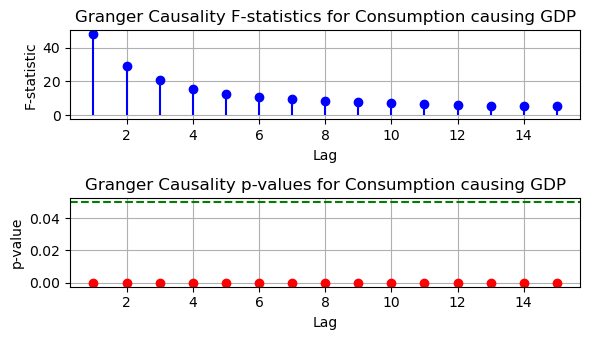

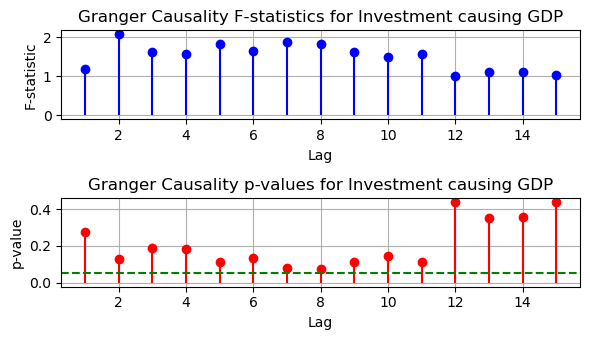

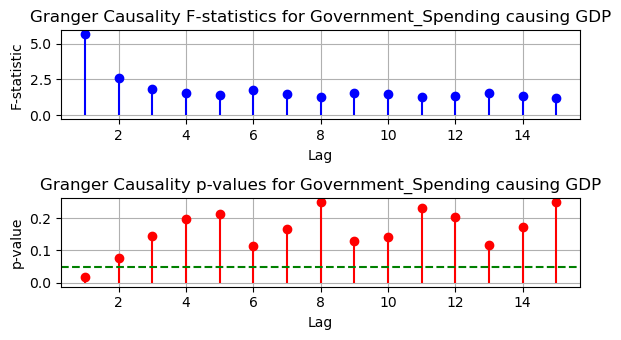

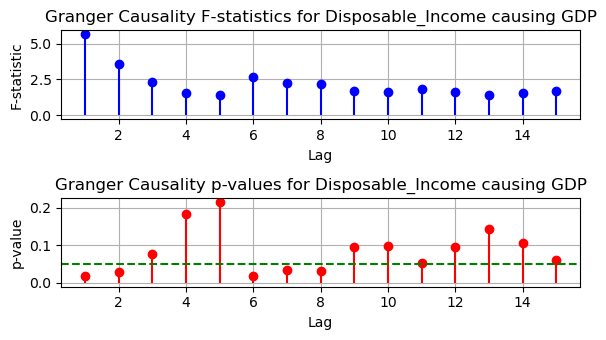

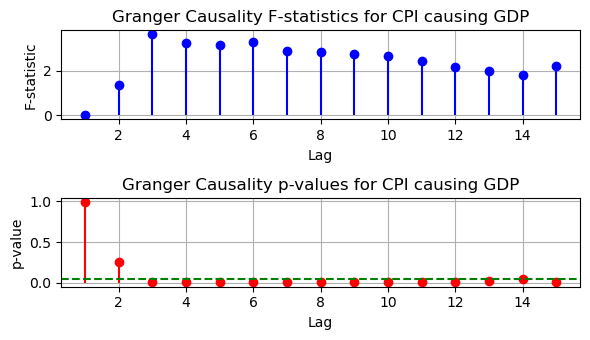

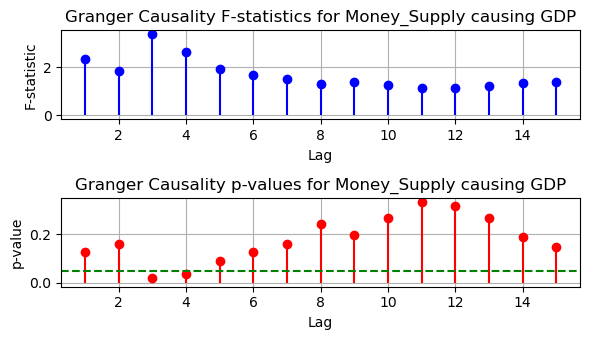

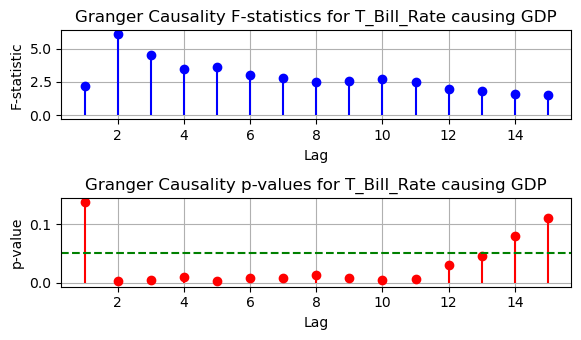

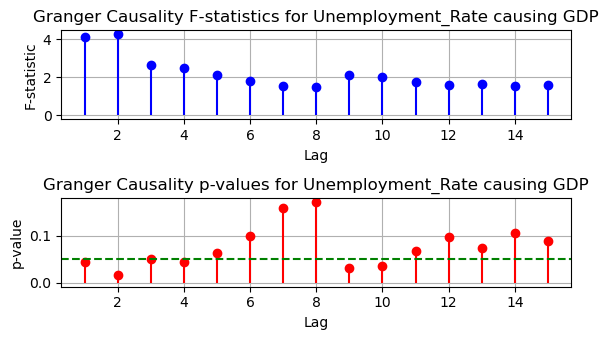

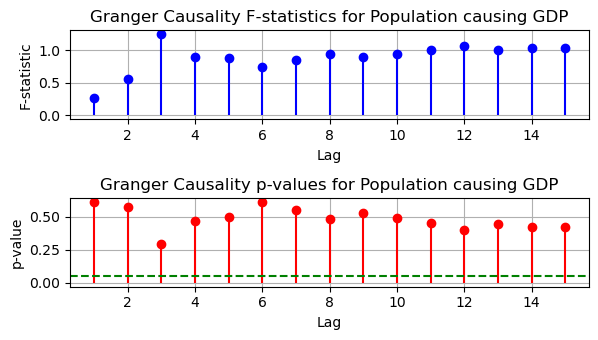

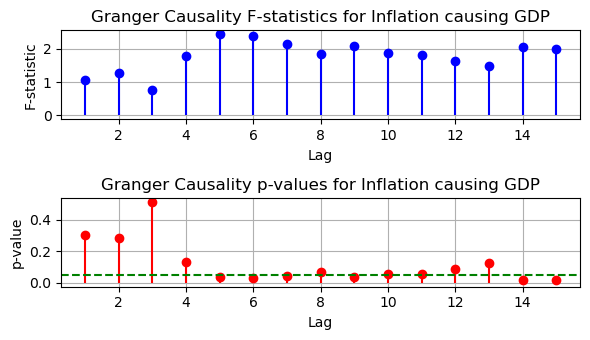

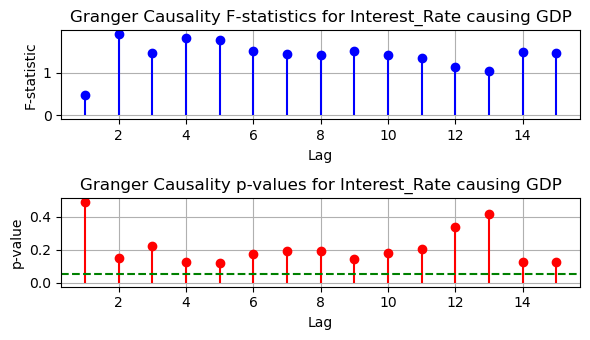

,Consumption_pv,Investment_pv,Government_Spending_pv,Disposable_Income_pv,CPI_pv,Money_Supply_pv,T_Bill_Rate_pv,Unemployment_Rate_pv,Population_pv,Inflation_pv,Interest_Rate_pv
Lag,,,,,,,,,,,
1,6.417335e-11,0.277835,0.018353,0.018358,0.995313,0.126162,0.138375,0.044078,0.608628,0.301728,0.490000
2,9.022616e-12,0.129151,0.076968,0.029904,0.255632,0.158473,0.002736,0.015432,0.573174,0.283790,0.151828
3,8.557842e-12,0.186706,0.144791,0.078068,0.013789,0.019148,0.004450,0.049715,0.295566,0.513388,0.222430
4,4.779596e-11,0.183637,0.196981,0.184885,0.013266,0.034353,0.008976,0.043821,0.469091,0.133214,0.127949
5,1.317820e-10,0.110545,0.211679,0.216351,0.009018,0.087703,0.003486,0.063567,0.497940,0.036270,0.122374
6,3.683192e-10,0.134792,0.112348,0.017259,0.004293,0.127504,0.007985,0.100253,0.611966,0.030248,0.173268
7,6.121234e-10,0.077847,0.164978,0.032941,0.006690,0.160796,0.008350,0.159204,0.550422,0.041362,0.191305
8,7.574662e-10,0.073477,0.248829,0.030108,0.005542,0.241083,0.013873,0.172244,0.485252,0.070872,0.190750
9,1.864929e-09,0.114957,0.128139,0.096491,0.004779,0.196569,0.007736,0.031304,0.527950,0.033287,0.144640


In [45]:
granger_pv_results = run_granger_causality(df_diff, 'GDP', num_lags=15, figsize=(6, 3.5))
granger_pv_results

#### Variables to consider include in the VAR model:

1. **Consumption**
- Cross-Correlation Showed strong correlation at multiple lags.
- Granger Causality: Highly significant p-values across all lags 
- key predictor

2. **Government_Spending**
- Cross-Correlation: Moderate positive correlation 
- Granger Causality: P-values below 0.05 at multiple lags 
- Conclusion: also a significant predictor 

3. **CPI** (Consumer Price Index)
- Cross-Correlation: Moderate correlations at different lags
- Granger Causality: P-values below 0.05 at several lags 
Conclusion: CPI shows both correlation and causality, suitable as a predictor 

4. **Unemployment_Rate**
- Cross-Correlation: Negative correlation, indicating an inverse relationship
- Granger Causality: Significant p-values at multiple lags 
- Conclusion: useful as a predictor to capture the inverse impact on GDP


### 4. Cointegration Testing 
- Test for cointegration among the variables to identify long-term equilibrium relationships

#### Steps to follow:
1. Perform the Johansen cointegration test **on the original data** (with trends) to check if multiple variables have long-term relationships.
2. Evaluate the test statistics to determine if cointegration is present.

- Note: Perform the cointegration test on the original data (with trends) as cointegration analysis requires non-stationary data to identify equilibrium relationships

In [46]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [47]:
coint_results = coint_johansen(df, det_order=-1, k_ar_diff=10)
# print coin_johansen_results
print('trace statistic for all columns:', coint_results.lr1)
print('\ncritical values 90% 95% 99% of trace statistic:', coint_results.cvt)


trace statistic for all columns: [818.29256728 664.57784762 536.5502932  431.8476598  330.82794917
 257.89780998 190.47538893 132.29847309  77.54361538  42.45892985
  21.60249788   1.36495629]

critical values 90% 95% 99% of trace statistic: [[302.9054 311.1288 326.9716]
 [255.6732 263.2603 277.9962]
 [212.4721 219.4051 232.8291]
 [173.2292 179.5199 191.8122]
 [137.9954 143.6691 154.7977]
 [106.7351 111.7797 121.7375]
 [ 79.5329  83.9383  92.7136]
 [ 56.2839  60.0627  67.6367]
 [ 37.0339  40.1749  46.5716]
 [ 21.7781  24.2761  29.5147]
 [ 10.4741  12.3212  16.364 ]
 [  2.9762   4.1296   6.9406]]


#### Evaluate cointegration results
- If the test statistic is greater than the critical value, there is evidence of cointegration

1. Compare the trace statistics to the critical values at the 95% level 
2. If the trace statistic exceeds the critical value, there is evidence of cointegration
3. Select the variables that are cointegrated with the target variable that may be included in the VECM model

In [48]:
def evaluate_cointegration(coint_result, data_df):
    trace_stat_critical_values = coint_result.cvt[:, 1]  # Critical values at 5% level
    cointegrated_vars = []
    for i, stat in enumerate(coint_result.lr1):
        if stat > trace_stat_critical_values[i]:
            print(f'Cointegration relationship found for rank {i+1}')
            cointegrated_vars.append(data_df.columns[i])
        else:
            print(f'No cointegration relationship found for rank {i+1}')
    return cointegrated_vars

# Run the cointegration test and get the cointegrated variables
cointegrated_variables = evaluate_cointegration(coint_result, df)
print('\n Cointegrated Variables:', cointegrated_variables)


Cointegration relationship found for rank 1
Cointegration relationship found for rank 2
Cointegration relationship found for rank 3
Cointegration relationship found for rank 4
Cointegration relationship found for rank 5
Cointegration relationship found for rank 6
Cointegration relationship found for rank 7
Cointegration relationship found for rank 8
Cointegration relationship found for rank 9
Cointegration relationship found for rank 10
Cointegration relationship found for rank 11
No cointegration relationship found for rank 12

 Cointegrated Variables: ['GDP', 'Consumption', 'Investment', 'Government_Spending', 'Disposable_Income', 'CPI', 'Money_Supply', 'T_Bill_Rate', 'Unemployment_Rate', 'Population', 'Inflation']


- The output suggests that almost all the variables are cointegrated with GDP, however including all of them in the VECM model might make it overly complex
- We canse the Granger causality test results (of original data) to identify which variables have better predictive power

In [49]:
granger_pv_results = run_granger_causality(df, 'GDP', num_lags=10, plot_fig=False, figsize=(6, 3.5))
granger_pv_results

,Consumption_pv,Investment_pv,Government_Spending_pv,Disposable_Income_pv,CPI_pv,Money_Supply_pv,T_Bill_Rate_pv,Unemployment_Rate_pv,Population_pv,Inflation_pv,Interest_Rate_pv
Lag,,,,,,,,,,,
1,6.674629e-01,0.096562,0.045177,0.832048,0.278619,0.081786,0.237872,0.513416,0.021331,0.205411,0.770650
2,1.134194e-09,0.791982,0.026642,0.061901,0.410861,0.005456,0.064298,0.008905,0.033686,0.057284,0.553047
3,9.596591e-12,0.236101,0.091028,0.027571,0.097321,0.019300,0.004039,0.009443,0.048815,0.018017,0.117800
4,7.291351e-12,0.332827,0.123910,0.085211,0.001731,0.008112,0.007349,0.021030,0.049806,0.026843,0.105406
5,4.995835e-11,0.215507,0.174277,0.146562,0.000327,0.014551,0.013153,0.028344,0.053524,0.036256,0.105726
6,2.709166e-10,0.113963,0.177224,0.262529,0.000634,0.034400,0.008271,0.034517,0.129623,0.021147,0.118612
7,6.896399e-10,0.102843,0.086428,0.026849,0.000918,0.055545,0.014953,0.062171,0.200418,0.025112,0.177451
8,1.362228e-09,0.038531,0.127250,0.052483,0.001240,0.065368,0.016846,0.115452,0.246287,0.031022,0.193379
9,3.473999e-09,0.024698,0.176662,0.068823,0.001597,0.097867,0.032131,0.165875,0.261983,0.059614,0.160854


#### Choosing predictors for VECM model

From the information above and the economic relevance we can cosider using:

1. **Consumption**: highly correlated with GDP and economically significant
2. **Investment**: Typically a good predictor of economic growth
3. **Unemployment_Rate**: Has an inverse relationship with economic activity and significant p_vales
4. **CPI**: Reflects inflation, which affects purchasing power. Low p_values at later lags
5. **Disposable_Income**: Reflects consumer spending capability.

### 5. Building and Evaluating a VAR Model 
- Use **Stationary** data, if necessary use pre-processing (in this case Differenced data)
- Use the target variable and other economic indicators as potential predictors
- Split data into training and testing sets- Use most of the data for training and leave a small portion for testing
- Fit model and select the optimal lag order by using statistical criteria such as AIC, BIC, FPE, and HQIC
- Train the VAR model with the selected lag order and Forcast future values (test length)
- Evaluate model performance, compare the forecasted values to the actual values from the test set and calculate evaluation metric (such as RMSE)




In [50]:
from statsmodels.tsa.api import VAR

#### Train Test Split

In [51]:
# Selecting the variables for VAR model
# According to the CCF and Granger Causality test results
var_df= df_diff[['GDP', 'Consumption', 'Government_Spending', 'Unemployment_Rate']] 

In [52]:
# Split the data into train and test sets based on specified proportion
def split_data(df, test_prop= 0.15):

    test_size = int(test_prop * len(df))
    train, test = df[:-test_size], df[-test_size:]

    print('train shape:', train.shape)
    print('test shape:', test.shape)
    print('split Date:', train.index.max())
    return train, test, test_size

In [53]:
train, test, test_size = split_data(var_df, test_prop=0.2)

train shape: (162, 4)
test shape: (40, 4)
split Date: 1999Q3


#### Fit the VAR model and Select lag order

In [54]:
# Fit the VAR model with the training data
# Use Real_GDP as the target variable and other economic indicators as potential predictors.
model = VAR(train)
lag_orders = model.select_order(maxlags=10)
print(lag_orders.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        16.40       16.48   1.320e+07       16.43
1        15.73      16.13*   6.815e+06      15.90*
2        15.70       16.42   6.589e+06       15.99
3       15.68*       16.71  6.454e+06*       16.10
4        15.72       17.07   6.735e+06       16.27
5        15.83       17.50   7.537e+06       16.51
6        15.94       17.93   8.505e+06       16.75
7        15.97       18.28   8.801e+06       16.91
8        16.00       18.63   9.150e+06       17.07
9        16.07       19.02   9.933e+06       17.27
10       16.20       19.46   1.148e+07       17.53
--------------------------------------------------


#### Train the VAR model with the selected lag order and Evaluate model performance

In [55]:
# Function to fit the VAR model, forecast the target variable, calculate RMSE and plot the forecasted values
def VAR_forecast_and_plot(model, train, test, target_variable, lag_order, test_size):
    # Fit the VAR model
    var_model = model.fit(lag_order)
    
    # Forecast using the VAR model
    forecast_values = var_model.forecast(train.values[-lag_order:], steps=test_size)
    forecast_df = pd.DataFrame(forecast_values, index=test.index, columns=train.columns)
    
    # Calculate the RMSE for target variable
    rmse = np.sqrt(mean_squared_error(test[target_variable], forecast_df[target_variable]))
    print(f'RMSE for {target_variable} with Lag {lag_order}: {rmse}')
    
    # Plot the forecasted values
    plt.figure(figsize=(7, 3))
    #train[target_variable].plot(label='Train')
    test[target_variable].plot(label='Test')
    forecast_df[target_variable].plot(label='Forecast')
    plt.title(f'Forecasted {target_variable} values')
    plt.legend()
    plt.show()

    return forecast_df, rmse

RMSE for GDP with Lag 2: 83.46589947475427


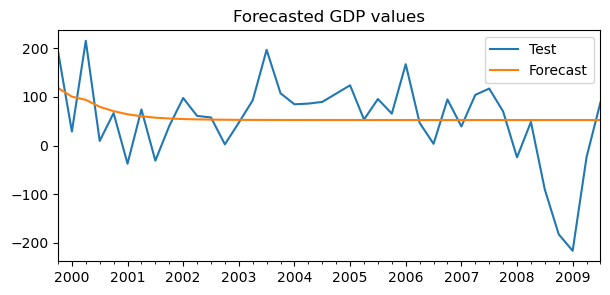

RMSE for GDP with Lag 4: 85.4417941270263


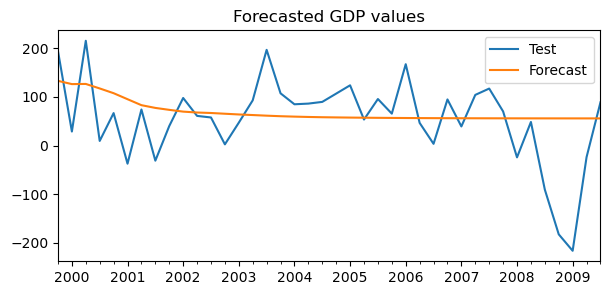

RMSE for GDP with Lag 6: 88.12806814975613


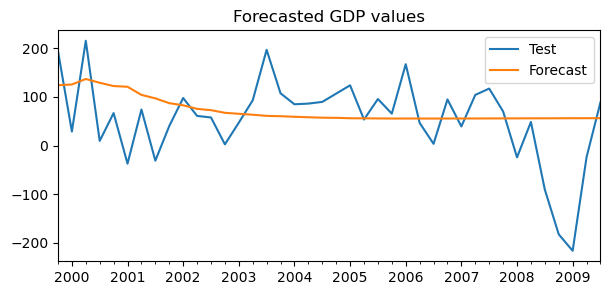

RMSE for GDP with Lag 8: 99.22459003584095


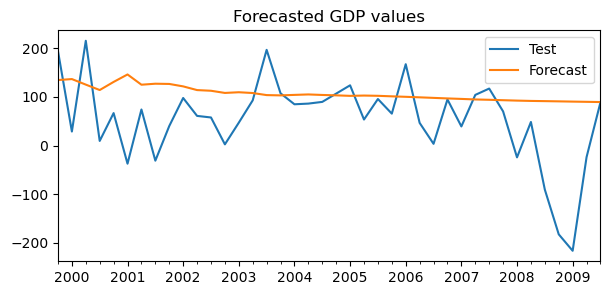

RMSE for GDP with Lag 10: 107.90347031227357


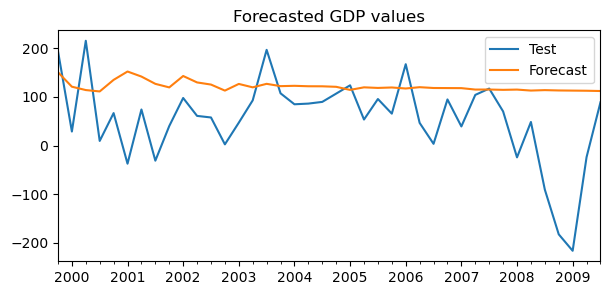

RMSE for GDP with Lag 12: 131.2660897016461


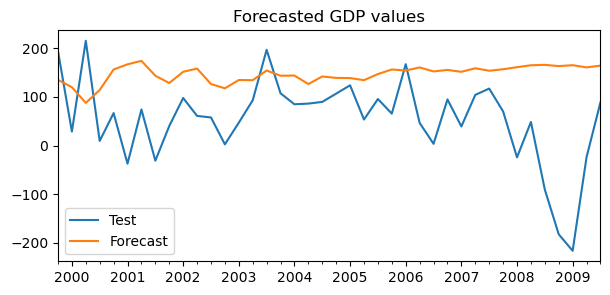

,Lag_Order,RMSE
0,2,83.465899
1,4,85.441794
2,6,88.128068
3,8,99.224590
4,10,107.903470
5,12,131.266090


In [56]:
# iterate over lag orders to get the RMSE for each lag order
rmse_results = pd.DataFrame(columns=['Lag_Order', 'RMSE'])
for lag_order in [2, 4, 6, 8, 10, 12]:
    forecast_df, rmse = VAR_forecast_and_plot(model, train, test, 'GDP', lag_order=lag_order, test_size=test_size)
    rmse_results = pd.concat([rmse_results, pd.DataFrame({'Lag_Order': [lag_order], 'RMSE': [rmse]})], ignore_index=True)

rmse_results

### 6. Fitting a VECM Model
#### Fit a Vector Error Correction Model (VECM) for cointegrated variables
- The VECM model should be fitted on the original non-stationary data, as it models the long-term equilibrium relationships
- Select the identified cointegration variables to fit the VECM model
- Fit the VECM model on the selected train set and forcast future values. Expirement with different variable selection, co-int ranks and lag orders to get the best RMSE
- Evaluate model performance, compare the forecasted values to the actual values from the test set and calculate evaluation metric (such as RMSE)

In [57]:
from statsmodels.tsa.vector_ar.vecm import VECM

#### Train Test Split

In [58]:
# Selecting the variables for VECM model
# According to the cointegration test and Granger Causality test results
vecm_df= df[['GDP', 'Consumption', 'Unemployment_Rate', 'CPI', 'Disposable_Income']] 

In [59]:
train, test, test_size = split_data(vecm_df, test_prop=0.2)

train shape: (163, 5)
test shape: (40, 5)
split Date: 1999Q3


#### Fit the VECM model on the selected train set and forcast future values

RMSE for GDP with Lag 3, Rank 4: 433.42028131942715


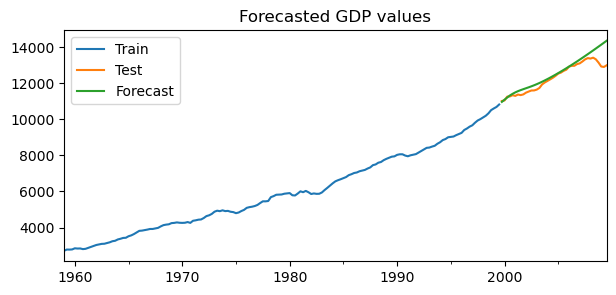

In [60]:
target_variable = 'GDP'
lag_order = 3
cointegration_rank = 4

# Fit the VECM model using the selected variables
vecm_model = VECM(train, k_ar_diff=lag_order, coint_rank=cointegration_rank)
vecm_fitted = vecm_model.fit()

# Forecast using the fitted VECM model
forecast_values_vecm = vecm_fitted.predict(steps=len(test))
forecast_df_vecm = pd.DataFrame(forecast_values_vecm, index=test.index, columns=train.columns)

# Calculate the RMSE for target variable
rmse = np.sqrt(mean_squared_error(test[target_variable], forecast_df_vecm[target_variable]))
print(f'RMSE for {target_variable} with Lag {lag_order}, Rank {cointegration_rank}: {rmse}')

# Plot the forecasted values
plt.figure(figsize=(7, 3))
train[target_variable].plot(label='Train')
test[target_variable].plot(label='Test')
forecast_df_vecm[target_variable].plot(label='Forecast')
plt.title(f'Forecasted {target_variable} values')
plt.legend()
plt.show()



### 7. Exploring ARIMAX with Exogenous Variables
- Fit an ARIMAX model with external variables as predictors
- Select the target variable and choose external variables- rely on domain knowledge to identify variables that are practically important, Use statistical tests to determine which variables have strong relationships with GDP
- Selecet model parameters and fit ARIMAX model
- predict future results and evaluate model performance
- Expiriment with different combination of external variables to - try gradually removing variables that do not contribute significantly to the model to find the most efective predictor variables

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Prepare the data- Select External Variables and Split train test sets

In [62]:
# Define target and exogenous variables (climate features as exogenous variables)
target_variable = 'GDP'
exogenous_variables = ['Consumption', 'Unemployment_Rate', 'CPI', 'Disposable_Income']

In [63]:
# split to train and test
train, test, test_size = split_data(df, test_prop=0.2)

# Define target and exogenous for training and testing
y_train = train[target_variable]
x_train = train[exogenous_variables]
y_test = test[target_variable]
x_test = test[exogenous_variables]

train shape: (163, 12)
test shape: (40, 12)
split Date: 1999Q3


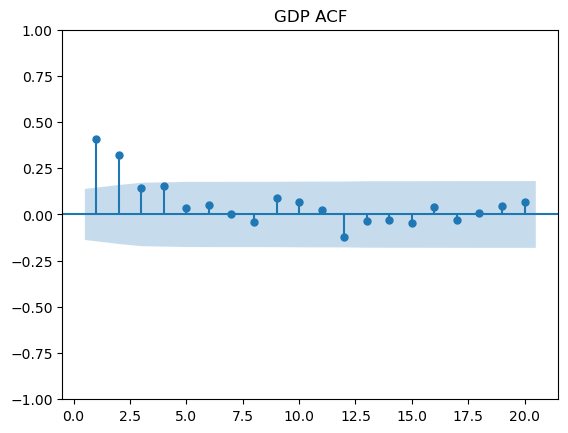

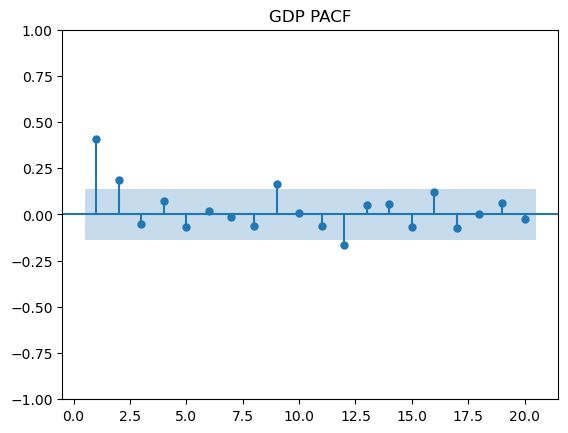

In [64]:
# Plot ACF and PACF for PM2.5
plot_acf(df_diff['GDP'], lags=20, zero=False)
plt.title('GDP ACF')
plt.show()

plot_pacf(df_diff['GDP'], lags=20, zero=False)
plt.title('GDP PACF')
plt.show()

RMSE for GDP using ARIMAX: 231.11998196906072


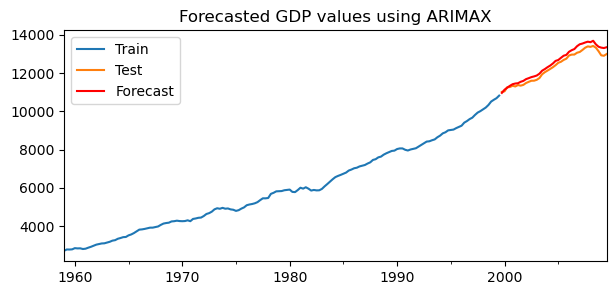

In [65]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMAX model with exogenous variables using ARIMA
arimax_model = ARIMA(y_train, exog=x_train, order=(2, 1, 2))
arimax_result = arimax_model.fit()

# Forecast using the ARIMAX model
forecast_values_arimax = arimax_result.forecast(steps=test_size, exog=x_test)

# Calculate the RMSE for target variable
rmse = np.sqrt(mean_squared_error(y_test, forecast_values_arimax))
print(f'RMSE for {target_variable} using ARIMAX: {rmse}')

# Plot the forecasted values
plt.figure(figsize=(7, 3))
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, forecast_values_arimax, label='Forecast', color='red')
plt.title(f'Forecasted {target_variable} values using ARIMAX')
plt.legend()
plt.show()



In [66]:
# Use auto_arima to find the best ARIMA model
auto_arima_model = auto_arima(y_train, exogenous=x_train, seasonal=False, stepwise=True, trace=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1762.819, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1732.134, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1713.962, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1760.828, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1712.231, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1706.092, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1730.158, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1705.011, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1725.236, Time=0.01 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1706.997, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1706.991, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  163
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -848.506
Date:                Thu, 24 Oct 2024   AIC                           1705.011
Time:                        15:28:38   BIC                           1717.337
Sample:                    03-31-1959   HQIC                          1710.016
                         - 09-30-1999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2778      0.084      3.316      0.001       0.114       0.442
ar.L2          0.1437      0.075      1.925      0.054      -0.003       0.290
ma.L1         -0.9619      0.042    -22.988      0.000      -1.044      -0.880
sigma2      2188.2382    186.800     11.714      0.000    1822.116    2554.360
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                17.20
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.00
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE for GDP using ARIMAX: 148.9847355827404


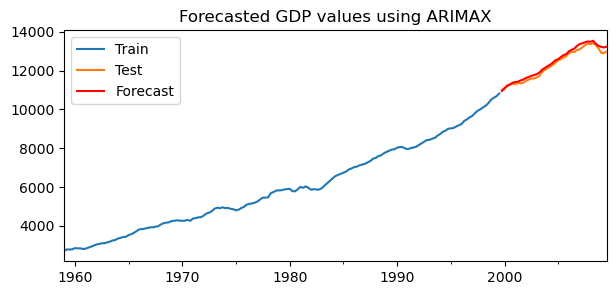

In [67]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMAX model with exogenous variables using ARIMA
arimax_model = ARIMA(y_train, exog=x_train, order=(2, 2, 1))
arimax_result = arimax_model.fit()

# Forecast using the ARIMAX model
forecast_values_arimax = arimax_result.forecast(steps=test_size, exog=x_test)

# Calculate the RMSE for target variable
rmse = np.sqrt(mean_squared_error(y_test, forecast_values_arimax))
print(f'RMSE for {target_variable} using ARIMAX: {rmse}')

# Plot the forecasted values
plt.figure(figsize=(7, 3))
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, forecast_values_arimax, label='Forecast', color='red')
plt.title(f'Forecasted {target_variable} values using ARIMAX')
plt.legend()
plt.show()